##Introduction -:
Santander Customer Satisfaction is a competition posted by Santander Bank on Kaggle.As for any 
business customer satisfaction is important to grow the buisness.Similarly, Santander was asking 
Kagglers to find happy and unhappy customer using machine learning algorithm.

##Business problem: -
1.we need to predict whether a customer is satisfied with their services based on the features provided 
by the company or not . This will help them to take appropriate action to improve the customer 
satisfaction to stay longer with bank before the customer leave .

2.To build a machine learning algorithm using the training data set and predict the total satisfied and 
unsatisfied customers in the Santander test data set.

In [ ]:
#Importing  important libraries 
import warnings
import pickle
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Redaing Train data
train_data=pd.read_csv('/content/drive/MyDrive/santander-customer-satisfaction/train.csv')
#Redaing Test  Data 
test_data = pd.read_csv('/content/drive/MyDrive/santander-customer-satisfaction/test.csv')

In [ ]:
train_data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


*   There are 76020 data points 370 Independet feature    and    1 dependent Target variable.

*   0 represent Happy Customer 
*   1 represent Unhappy Customer















In [ ]:
test_data.head(5)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.43,6.00,4.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.55,3.00,2.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57.00,51.45,66.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.87,30.00,21.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
print(test_data.shape)

(75818, 370)


There are 75818  data points 370 feature in test data

In [ ]:
colum_=np.array(train_data.columns.to_list())
feature=[col for col in train_data.columns if col not in ["ID","TARGET"]]
print(feature)

['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'i

#Exploratory data analysis

###Check the Train-test Distribution
Before we doing our work, we might be extremely interested in the distribution of the dataset. The division of train set and test set should be as balanced as possible in all kinds of aspects.
if not then have to make it balance or can say normally distributed  using  Log Transformation,Box-Cox Transformation.

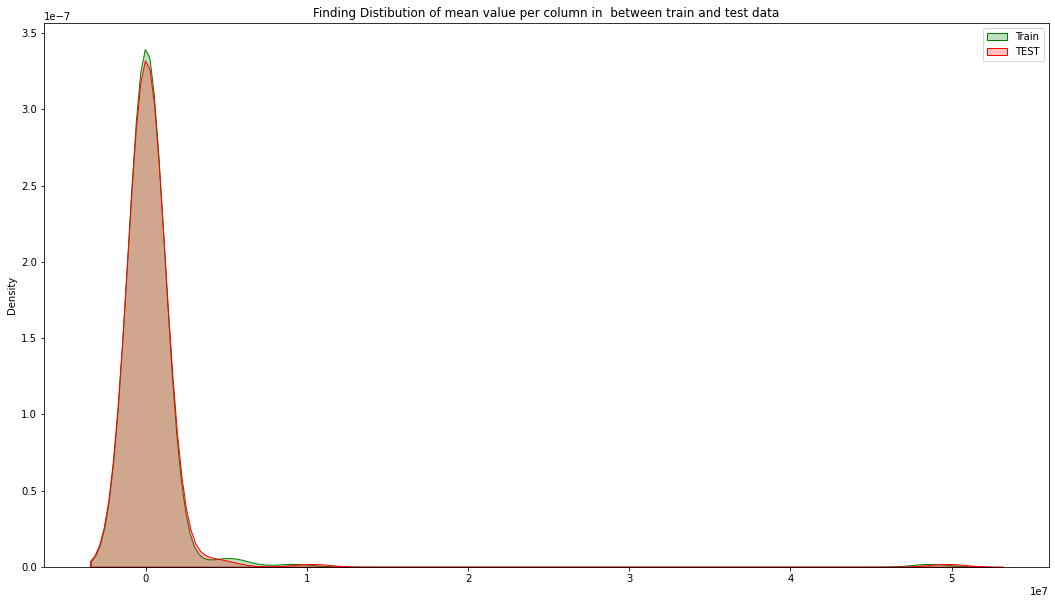

In [ ]:
plt.figure(figsize=(18,10))
sns.kdeplot(train_data[feature].mean(axis=0), fill=True,color='green',label="Train")
sns.kdeplot(test_data[feature].mean(axis=0), fill=True,color='red',label="TEST")
plt.title('Finding Distibution of mean value per column in  between train and test data')
plt.legend()
plt.show()

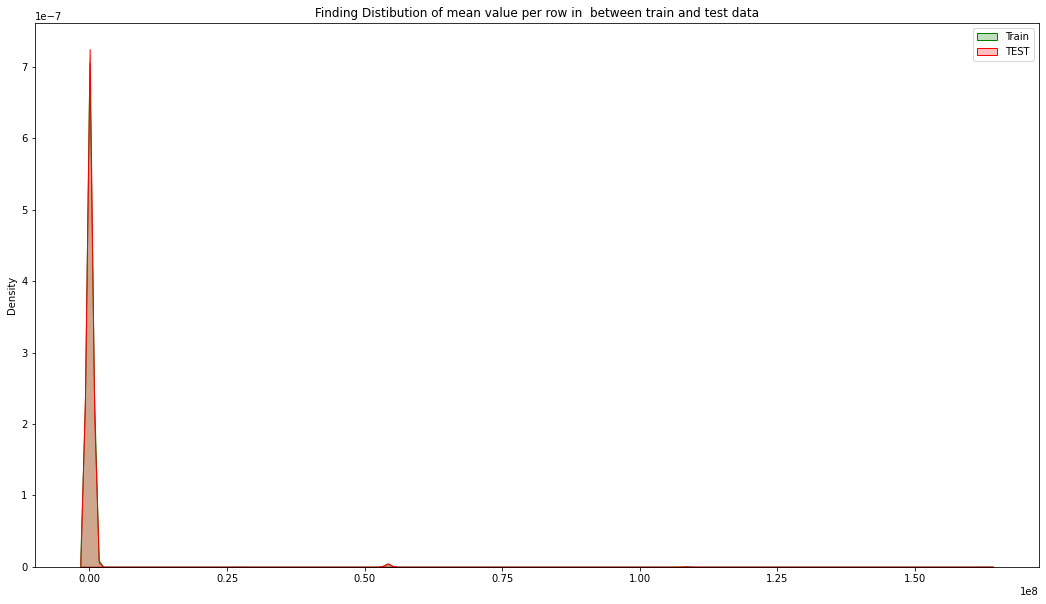

In [ ]:
plt.figure(figsize=(18,10))
sns.kdeplot(train_data[feature].mean(axis=1), fill=True,color='green',label="Train")
sns.kdeplot(test_data[feature].mean(axis=1), fill=True,color='red',label="TEST")
plt.title('Finding Distibution of mean value per row in  between train and test data')
plt.legend()
plt.show()

####We can see data distitbution of both(tain  and test) almost balanced ,so during testing our resault will be not bisaed.


###TARGET (Dependent varibale)

In [ ]:
#Target Variable Analysis 
train_data["TARGET"].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [ ]:
Traget_0=(100.* train_data["TARGET"].value_counts()[0] / 76020).round(1)
Traget_1=(100.* train_data["TARGET"].value_counts()[1] / 76020).round(1)

In [ ]:
print("Happy Customer = " + str(Traget_0)+"%")
print("Unhappy Customer = "+str(Traget_1)+"%")

Happy Customer = 96.0%
Unhappy Customer = 4.0%


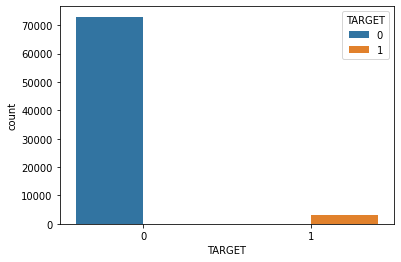

In [ ]:
sns.countplot(x="TARGET",hue="TARGET",data=train_data);
 
# Show the plot
plt.show()

####We Can see Dataset is higly Imbalance .
####So before feeding into model we have to make it balance othewise result will be bias .
####we will fix this during doing Feature engeering

Lets Check data distribution according to customer type

In [ ]:
#Checking Null value in train dataset 
train_data.columns[train_data.isnull().any()]

Index([], dtype='object')

###There are no null or missing value in dataset .

Select Top 20 feature using SelectKBest for further data analysis.

Refrence: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [ ]:
x=train_data.drop(["ID","TARGET"],axis = 1)
y=train_data["TARGET"]

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Create and fit selector
selector = SelectKBest(f_classif, k=20) #k is number of top feature
selector.fit(x, y)
mask = selector.get_feature_names_out(input_features=None)
print("Top 15 Feature",mask)

Top 15 Feature ['var15' 'ind_var5' 'ind_var8_0' 'ind_var12_0' 'ind_var13_0'
 'ind_var13_corto' 'ind_var13' 'ind_var30' 'ind_var39_0' 'num_var4'
 'num_var5' 'num_var8_0' 'num_var13_0' 'num_var13' 'num_var30' 'num_var35'
 'num_var42' 'saldo_var30' 'var36' 'num_meses_var5_ult3']


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 21  22  56  57  58  59  80  84  85 131 132 133 134 155 161 162 179 180
 189 192 220 222 234 238 244 248 261 262 303 307 315 319 327 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


###Constant Feature

In [ ]:
train_data.iloc[:, [21, 22 , 56 , 57 , 58 , 59 , 80 , 84, 85 ,131, 132, 133 ,134, 155 ,161 ,162 ,179, 180, 189 ,192, 220, 222, 234 ,238 ,244 ,248 ,261 ,262 ,303 ,307 ,315, 319 ,327, 349]].head(5)

,ind_var1,ind_var2_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var41_0,ind_var44,ind_var46_0,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var41_0,num_var44,num_var46_0,saldo_var25,saldo_var28,saldo_var40,saldo_var44,delta_num_venta_var44_1y3,imp_amort_var18_ult1,imp_compra_var44_ult1,imp_reemb_var17_ult1,imp_trasp_var17_in_ult1,imp_trasp_var33_in_ult1,var21,num_var2_0_ult1,num_op_var39_efect_ult3,num_reemb_var17_ult1,num_trasp_var17_in_ult1,num_trasp_var33_in_ult1,num_var45_ult3,saldo_medio_var13_medio_hace2
0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,1,0,0,9,0,0,0,3,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,48,0.0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0


In [ ]:
Top_Feature=['var15','ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var13_0',
 'ind_var13_corto', 'ind_var13', 'ind_var30', 'ind_var39_0', 'num_var4',
 'num_var5' ,'num_var8_0' ,'num_var13_0' ,'num_var13', 'num_var30', 'num_var35',
 'num_var42', 'saldo_var30' ,'var36', 'num_meses_var5_ult3']

In [ ]:
Top_20_Feature_With_target=train_data[Top_Feature+['TARGET']]
print(list(Top_20_Feature_With_target.columns)) #we get 21 feature including target variable

['var15', 'ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var13_0', 'ind_var13_corto', 'ind_var13', 'ind_var30', 'ind_var39_0', 'num_var4', 'num_var5', 'num_var8_0', 'num_var13_0', 'num_var13', 'num_var30', 'num_var35', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3', 'TARGET']


In [ ]:
Top_10_Feature_With_target=['var15', 'ind_var5', 'ind_var30' ,'num_var4', 'num_var5' ,'num_var30',
 'num_var35', 'num_var42' ,'var36', 'num_meses_var5_ult3','TARGET']

* Using SelectKBest i got 20 important feature ['var15','ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var13_0',
 'ind_var13_corto', 'ind_var13', 'ind_var30', 'ind_var39_0', 'num_var4',
 'num_var5' ,'num_var8_0' ,'num_var13_0' ,'num_var13', 'num_var30', 'num_var35'
 'num_var42', 'saldo_var30' ,'var36', 'num_meses_var5_ult3']

* Also got to know Features [ 21,  22 , 56 , 57 , 58 , 59 , 80 , 84,  85 ,131, 132, 133 ,134, 155 ,161 ,162 ,179, 180,
 189 ,192, 220, 222, 234 ,238 ,244 ,248 ,261 ,262 ,303 ,307 ,315, 319 ,327, 349] are constant  (These all are feature  colum's index )

*   we can remove 34 constant feature during feature preprocessing  as they  are not contibuting much for classfication.

####Find quasi-constant features
Let's first find out the number of quasi-constant features.

In [ ]:
vt = VarianceThreshold(threshold=0.02)
v_threshold = vt.fit(x)
#The get_support returns a Boolean vector where True means that the variable does not have zero variance so we will remove False vaibale
Quasi_feature = v_threshold.get_support()
k=np.where(Quasi_feature==False)
print("quasi-constant features={}".format(len(k[0])))

quasi-constant features=106


*   
Quasi-constant features are those that show the same value for the great majority of the observations.
*   We assume that features with a higher variance may contain more useful information
*  Using a feature with zero-variance or little variane  only adds to model complexity, not to its predictive power ,So we will remove feature  with lower variacnce.

*   There are 106 quasi_Fconstant featute while doing feature engrring we wiil remove this.



##Univaraite analysis
###we will select 1 feature at time to understand data's insight 

In [ ]:
unique_colm=[]
for k in colum_:
  res=k.split("_")[0] #indexing zero becaue we want first  word after spliting e.g imp_op_var39_comer_ult3 geiing only imp
  unique_colm.append(res)
res=(unique_colm)
print(res)

['ID', 'var3', 'var15', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'imp', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'ind', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'num', 'nu

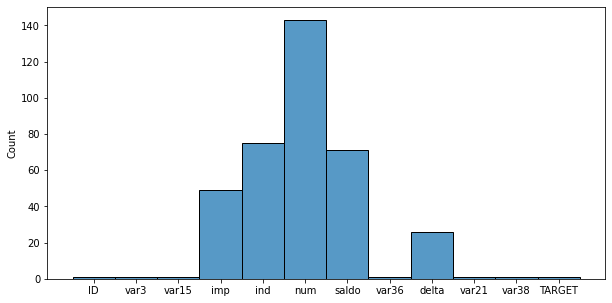

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(res)
plt.show()

####we ploted prefix column value and found rendring  num prefix column is  high
####We will do analysis  on all the keyword appear on x-axis in above graph
####Here prefix num rendring is high so let start analyis with num


In [ ]:
Num_colm=[]
for i in colum_:
  res=i.split("_")[0] 
  if res =='num':
    Num_colm.append(i)
print(Num_colm)
print("Number of "'num'" prefix column is = {}".format(len(Num_colm)))

['num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_largo_0', 'num_var13_largo', 'num_var13_medio_0', 'num_var13_medio', 'num_var13', 'num_var14_0', 'num_var14', 'num_var17_0', 'num_var17', 'num_var18_0', 'num_var18', 'num_var20_0', 'num_var20', 'num_var24_0', 'num_var24', 'num_var26_0', 'num_var26', 'num_var25_0', 'num_var25', 'num_op_var40_hace2', 'num_op_var40_hace3', 'num_op_var40_ult1', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_hace2', 'num_op_var39_hace3', 'num_op_var39_ult1', 'num_op_var39_ult3', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var29_0', 'num_var29', 'num_var30_0', 'num_var30', 'num_var31_0', 'num_var31', 'num_var32_0', 'num_var32', 'num_var33_0', 'num_var33', 'num_var34_0', 'num_var34', 'num_var35', 'num_var37_med_u

###  Take 10 random num feature 

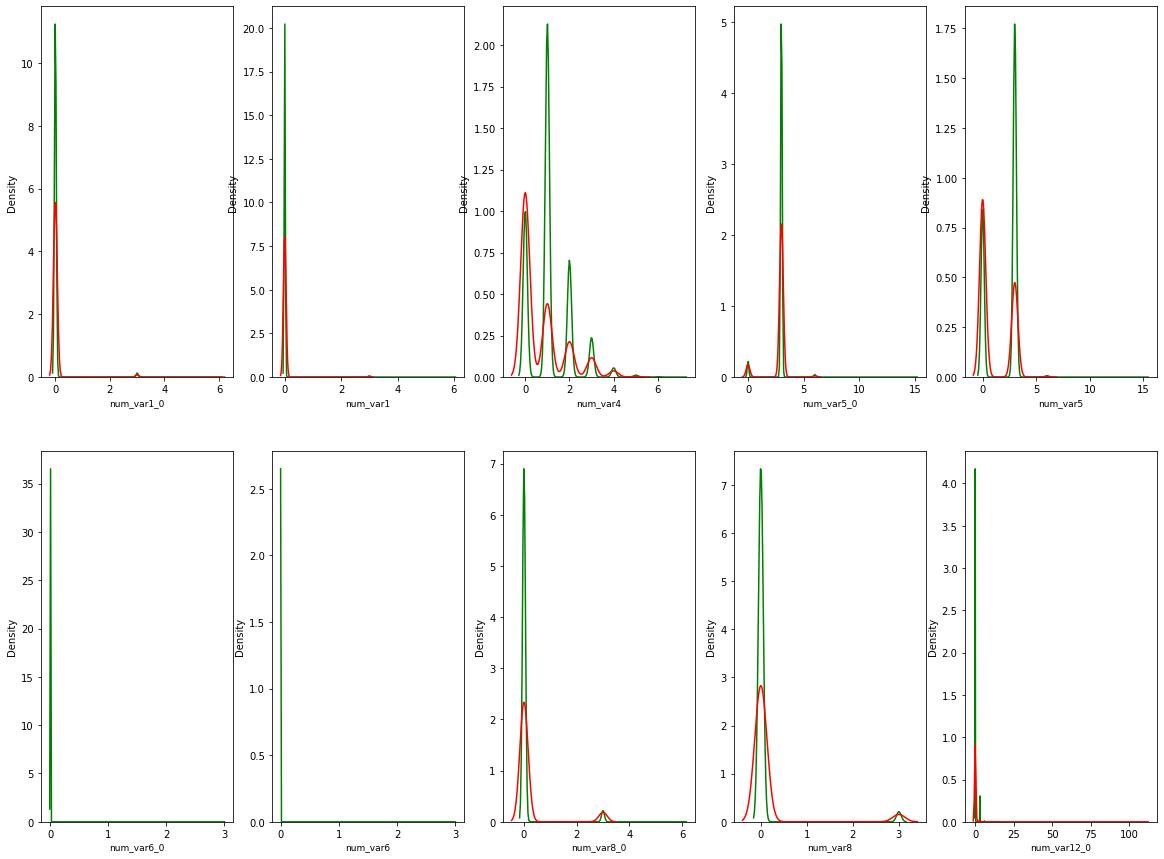

In [ ]:
def plot_Distibution(happy_dt,unhappy_dt,features):

  plt.figure(figsize=(20,15))
  i=0
  for feature in features:
    i+=1
    plt.subplot(2,5,i)
    sns.kdeplot(happy_dt[feature],color='green')
    sns.kdeplot(unhappy_dt[feature],color='red')
    plt.xlabel(feature,fontsize=9)
  plt.show()
happy_dt=train_data.loc[train_data["TARGET"]==0]  
unhappy_dt=train_data.loc[train_data["TARGET"]==1]  
feature=Num_colm [0:10]
plot_Distibution(happy_dt,unhappy_dt,feature)

####As we can see there are some plot which have happy and unhappy customer both ,also  sligtly gaussion distribution ,so we can consider these feature might be usefull ,also have some plot which has 0 variance so we can remove such feature.

###Prefix num_op (Number of transction)

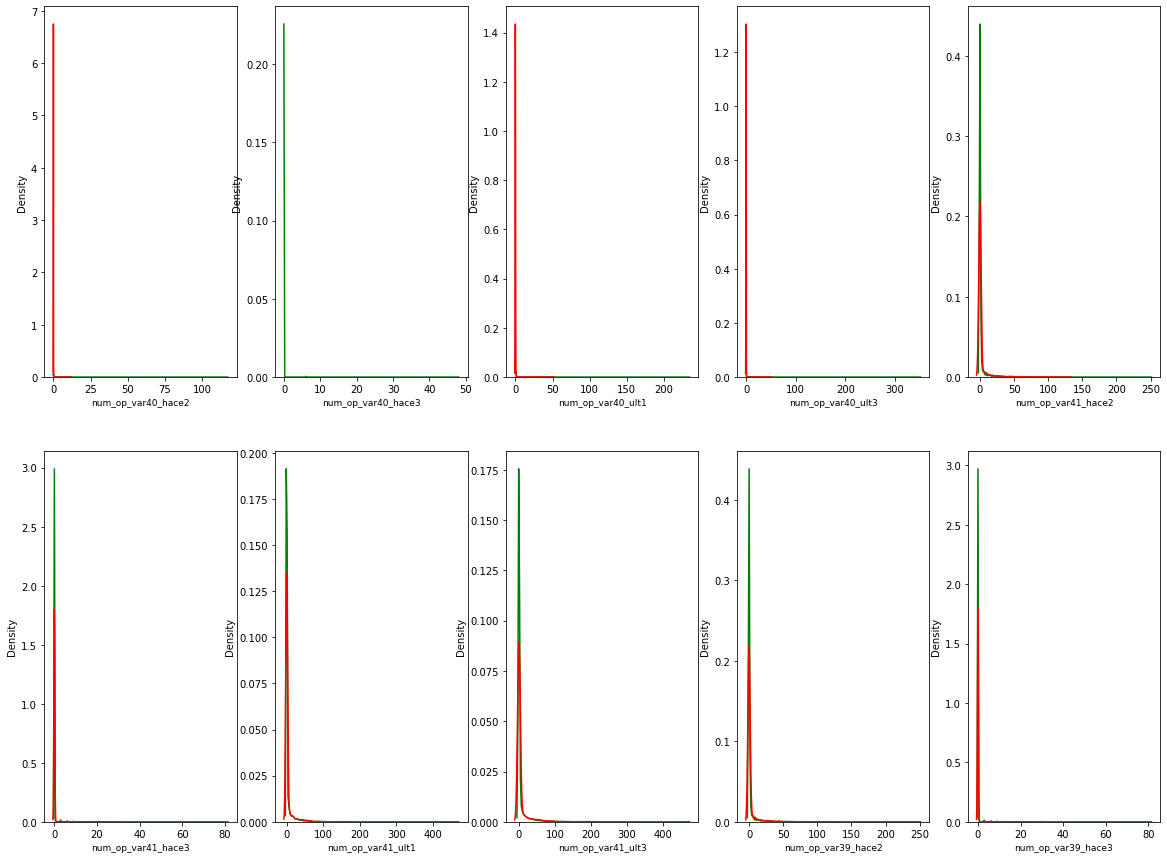

In [ ]:
substring="num_op"
strings_with_substring = [string for string in Num_colm if substring in string]
features=strings_with_substring[0:10]
plot_Distibution(happy_dt,unhappy_dt,features)    

‘num_op’ likey is shortened word for importe which is Spanish find num_op is number of transactions done  by  customer having seen above 4 graph have zero varinace , ('num_op_var40_hace2',
 'num_op_var40_hace3',
 'num_op_var40_ult1',
 'num_op_var40_ult3') so we can remove these feature ,
 and except this we are getting some insight about happy and unhappy custome data maigt be this feature would be usefull.

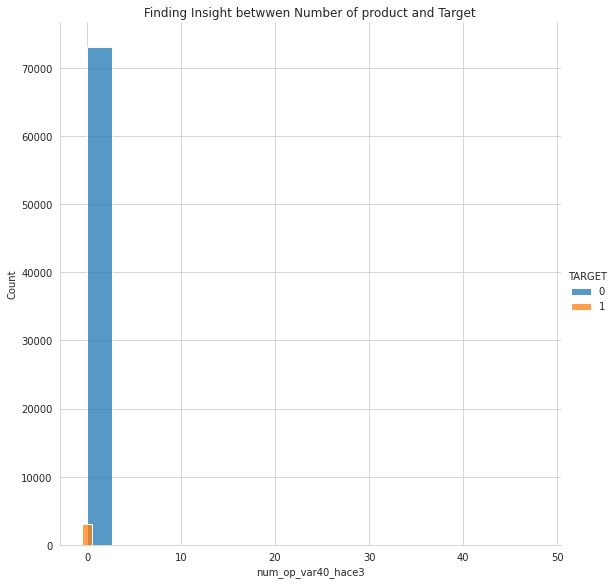

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(train_data,hue="TARGET",height=8)\
.map(sns.histplot,"num_op_var40_hace3")\
.add_legend()
plt.title('Finding Insight between number of operations and Target')
plt.show()

##num_var4 Bank Product

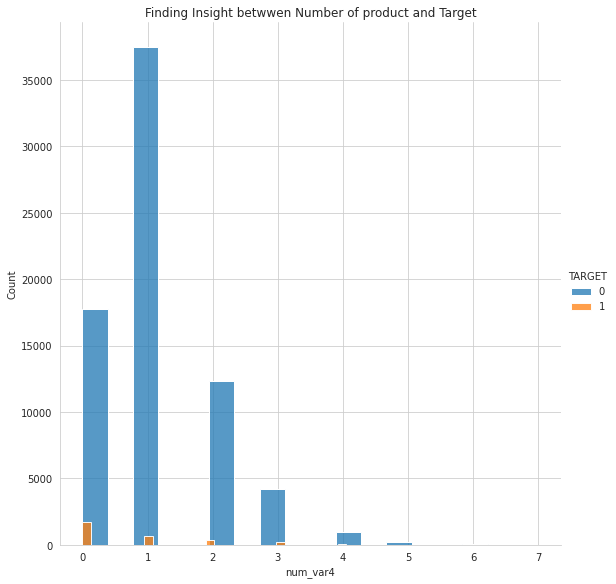

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(train_data,hue="TARGET",height=8)\
.map(sns.histplot,"num_var4")\
.add_legend()
plt.title('Finding Insight betwwen Number of product and Target')
plt.show()

According this comment  https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223)
### num_var4 is the number of products
Total number of bank product is 7 ,by using above plot we can see with bank product few customer are unhappy .
using  1 product's customer volume  is very high(happy customer) >using  2 product's customer volume  is high(happy customer)>using 3 product's customer volume  is less (happy customer)


##num_var35 analysis

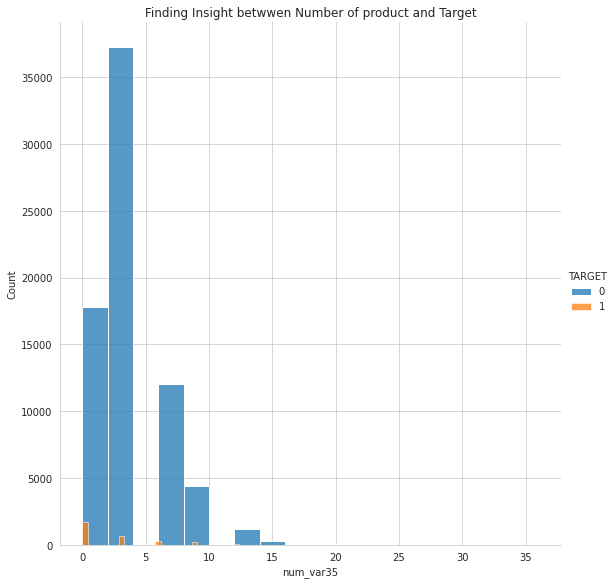

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(train_data,hue="TARGET",height=8)\
.map(sns.histplot,"num_var35")\
.add_legend()
plt.title('Finding Insight betwwen Number of product and Target')
plt.show()

######By seeing this can not say anything from which product its belong to but we observerd this we are getting happy and unhappy customer data distributiion  hence this feature may usefull

###Prefix "imp" analysis

In [ ]:
imp_colm=[]
for i in colum_:
  res=i.split("_")[0] 
  if res =='imp':
    imp_colm.append(i)
print(imp_colm)
print("Number of "'imp'" prefix column is = {}".format(len(imp_colm)))

['imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'imp_amort_var18_hace3', 'imp_amort_var18_ult1', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_aport_var13_hace3', 'imp_aport_var13_ult1', 'imp_aport_var17_hace3', 'imp_aport_var17_ult1', 'imp_aport_var33_hace3', 'imp_aport_var33_ult1', 'imp_var7_emit_ult1', 'imp_var7_recib_ult1', 'imp_compra_var44_hace3', 'imp_compra_var44_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var13_ult1', 'imp_reemb_var17_hace3', 'imp_reemb_var17_ult1', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_var43_emit_ult1', 'imp_trans_var37_ult1', 'imp_trasp_var17_in_hace3', 'imp_

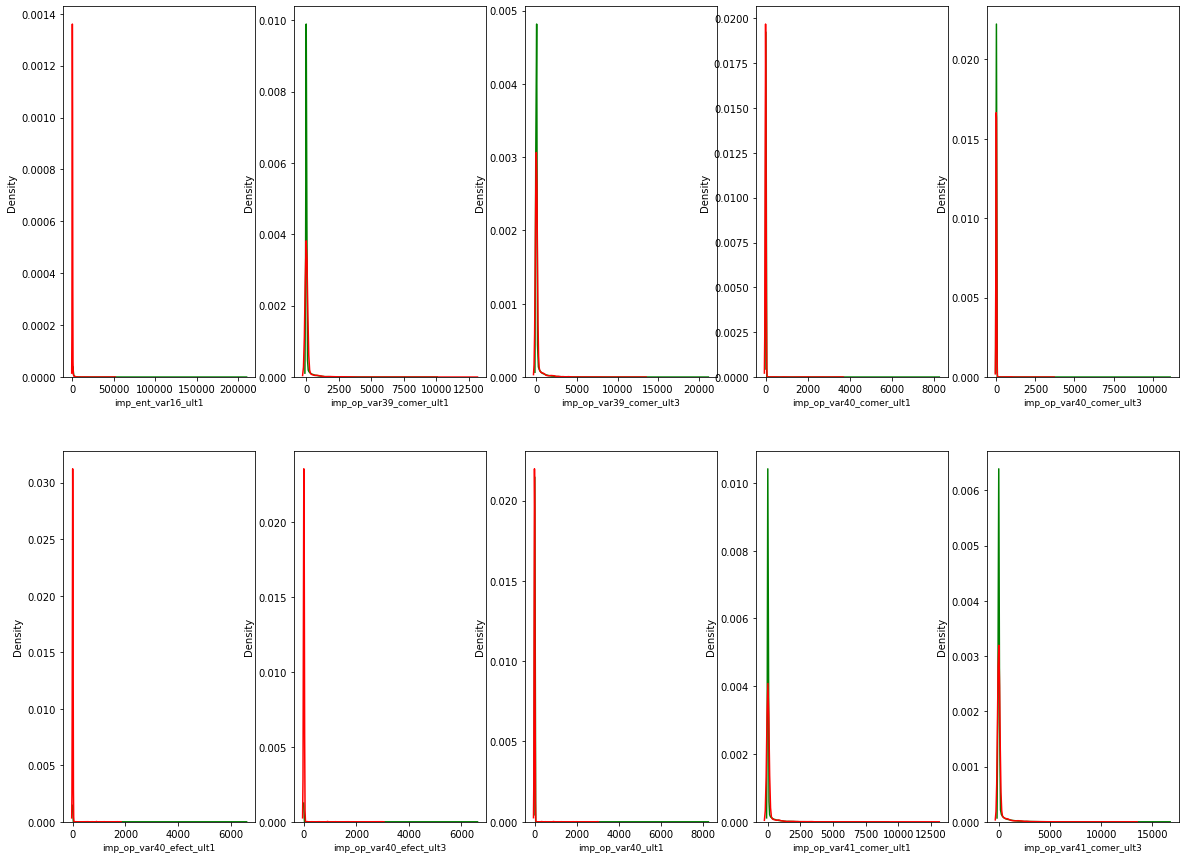

In [ ]:
features_imp=imp_colm[0:10]# taking 10  prefix imp feature to check data distibution
plot_Distibution(happy_dt,unhappy_dt,features_imp)

"imp" is short from of import (inferred from literature review) ,total number of "imp" prefix column is 49 .by above plot we can see most of data distribution happening  at zero .

###Prefix 'Saldo’ feature

In [ ]:
saldo_colm=[]
for i in colum_:
  res=i.split("_")[0] 
  if res =='saldo':
    saldo_colm.append(i)
print(saldo_colm)
print("Number of "'saldo'" prefix column is = {}".format(len(saldo_colm)))

['saldo_var1', 'saldo_var5', 'saldo_var6', 'saldo_var8', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13_medio', 'saldo_var13', 'saldo_var14', 'saldo_var17', 'saldo_var18', 'saldo_var20', 'saldo_var24', 'saldo_var26', 'saldo_var25', 'saldo_var28', 'saldo_var27', 'saldo_var29', 'saldo_var30', 'saldo_var31', 'saldo_var32', 'saldo_var33', 'saldo_var34', 'saldo_var37', 'saldo_var40', 'saldo_var41', 'saldo_var42', 'saldo_var44', 'saldo_var46', 'saldo_var2_ult1', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_medio_var8_hace2', 'saldo_medio_var8_hace3', 'saldo_medio_var8_ult1', 'saldo_medio_var8_ult3', 'saldo_medio_var12_hace2', 'saldo_medio_var12_hace3', 'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_hace2', 'saldo_medio_var13_corto_hace3', 'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_corto_ult3', 'saldo_medio_var13_largo_hace2', 'saldo_medio_var13_largo_hace3', 'saldo_med

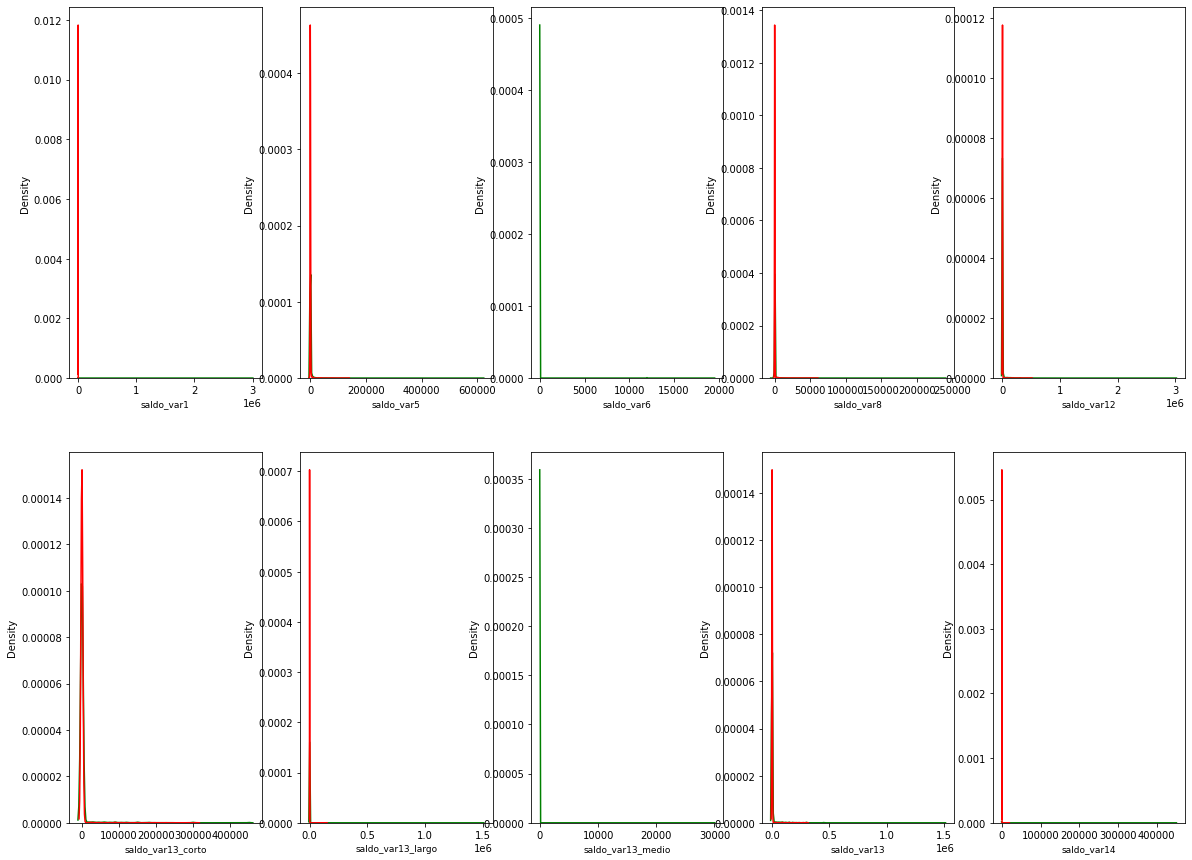

In [ ]:
features_saldo=saldo_colm[0:10]# taking 10  prefix saldo feature to check data distibution
plot_Distibution(happy_dt,unhappy_dt,features_saldo)

Total number of "Saldo" prefix column is 71 .by above plot we can see most of data distribution happening  at zero.
we will consider same as it data for model trainin.

##Var3(Natonlaity of customer)

In [ ]:
train_data["var3"].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [ ]:
train_data.loc[train_data.var3==-999999].shape

(116, 371)

In [ ]:
train_data.loc[train_data.var3==-999999].head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
782,1567,-999999,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
3361,6738,-999999,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1983.00,1983.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
4103,8225,-999999,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,84.18,67.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
4422,8879,-999999,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
7053,14142,-999999,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
print(100*(74165/76020)) # % of Appering 2 in dataset belong to Var3
print(100*(116/76020) ) # % of Appering -999999 in dataset belong to Var3

97.55985267034991
0.15259142330965536


####By refering some artical said that this feature contain natonlaity of customer and -999999 look like outlier, replace -999999 in var3 column with  value 2 and we aslo did some analysis in va3 ,most comman value 2 its appering 97% on train dataset so we can replace with 2

### See https://www.kaggle.com/cast42/santander-customer-satisfaction/debugging-var3-999999


Var15 (Customer Age)

In [ ]:
train_data["var15"].describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

We can see age  range of customer  5 to 105

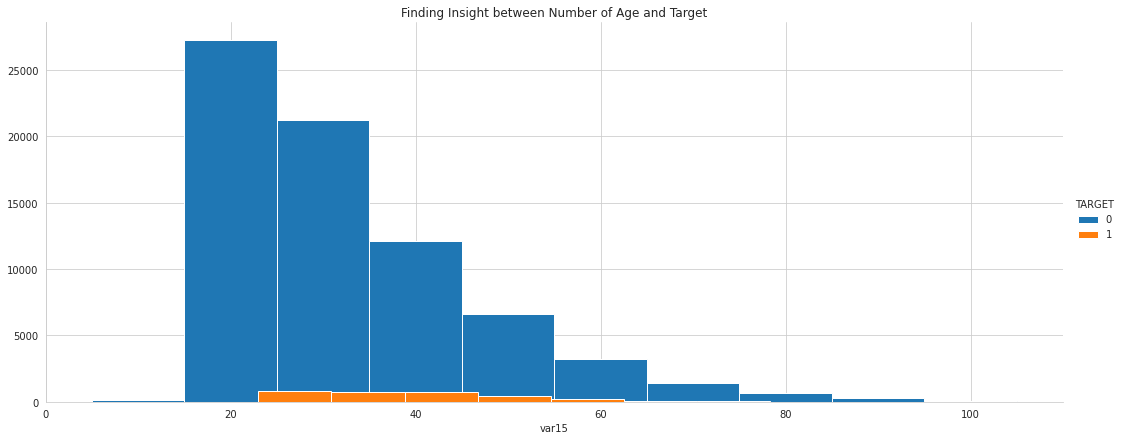

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(train_data,hue="TARGET",height=6,aspect=2.5)\
.map(plt.hist,"var15")\
.add_legend()
plt.title('Finding Insight between Number of Age and Target')
plt.show()

In [ ]:
Unappy_Customer=train_data.loc[train_data['TARGET']==1, 'var15']
Happy_Customer=train_data.loc[train_data['TARGET']==0, 'var15']

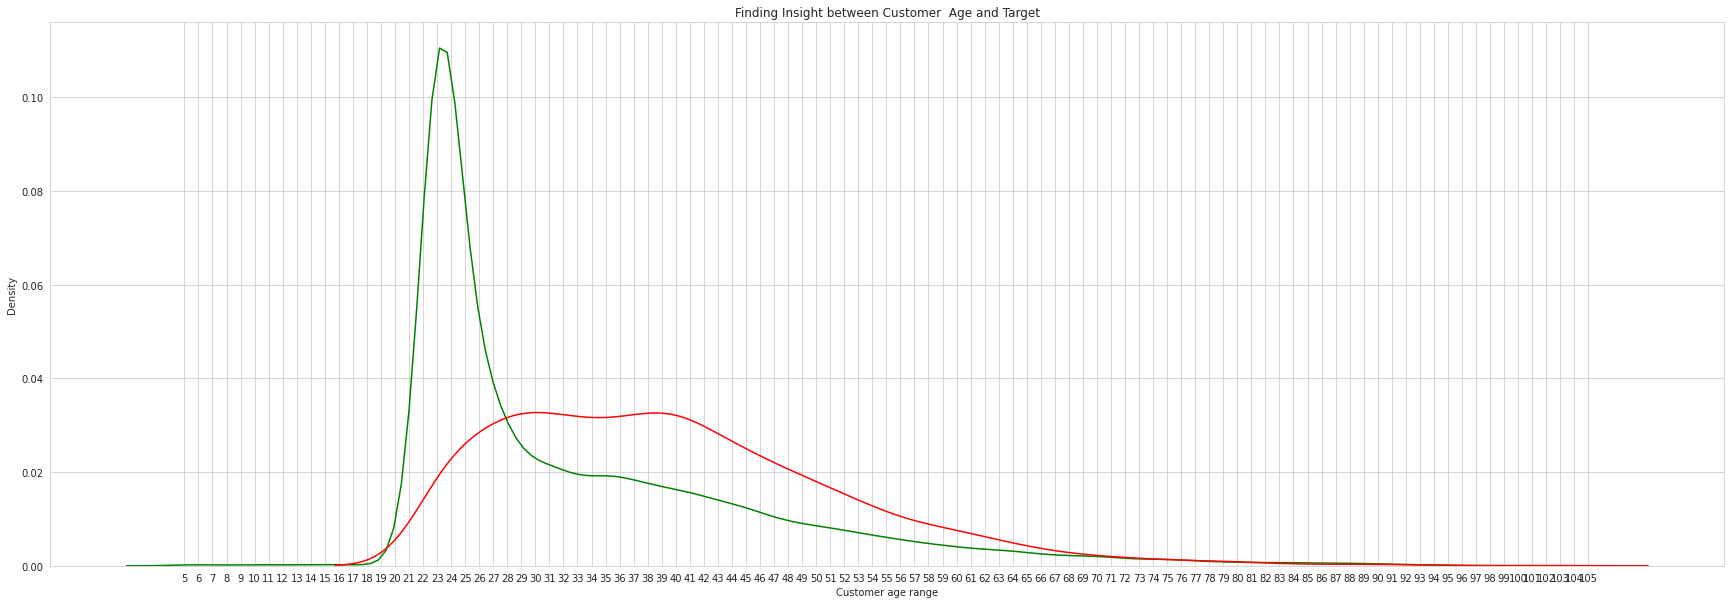

In [ ]:
plt.figure(figsize=(30,10))
sns.kdeplot(Happy_Customer,color='green')
sns.kdeplot(Unappy_Customer,color='red')
x_ = np.arange(5, 106, 1)

plt.title('Finding Insight between Customer  Age and Target')
plt.xlabel("Customer age range")
plt.xticks(x_)
plt.show()



*   Green plot represent :-Happy customer 
*   Red plot represent:-Unhappy customer



*   By above histogram and pdf (Unhappy cutsomer age range) graph we can see most of  unhappy customer  are older (more than  40  age group)
*  By above histogram and pdf (Happy cutsomer age range) graph we can see most of  happy customer  are younger (less than  30  age group)

*   By above histogram  we can see below age of 23 are totally  happy customer  we did not find any unhappy customer till age to 23
*   So  we can make new feature during feature engnerring age<23 is totally happy  customer or not





###Bivariate Analysis.
####Bivariate analysis is the analysis of any concurrent relationship of  two variavle .
####we will plot pairplot to see distribution  among  all the important feature or attribute.

<Figure size 576x360 with 0 Axes>

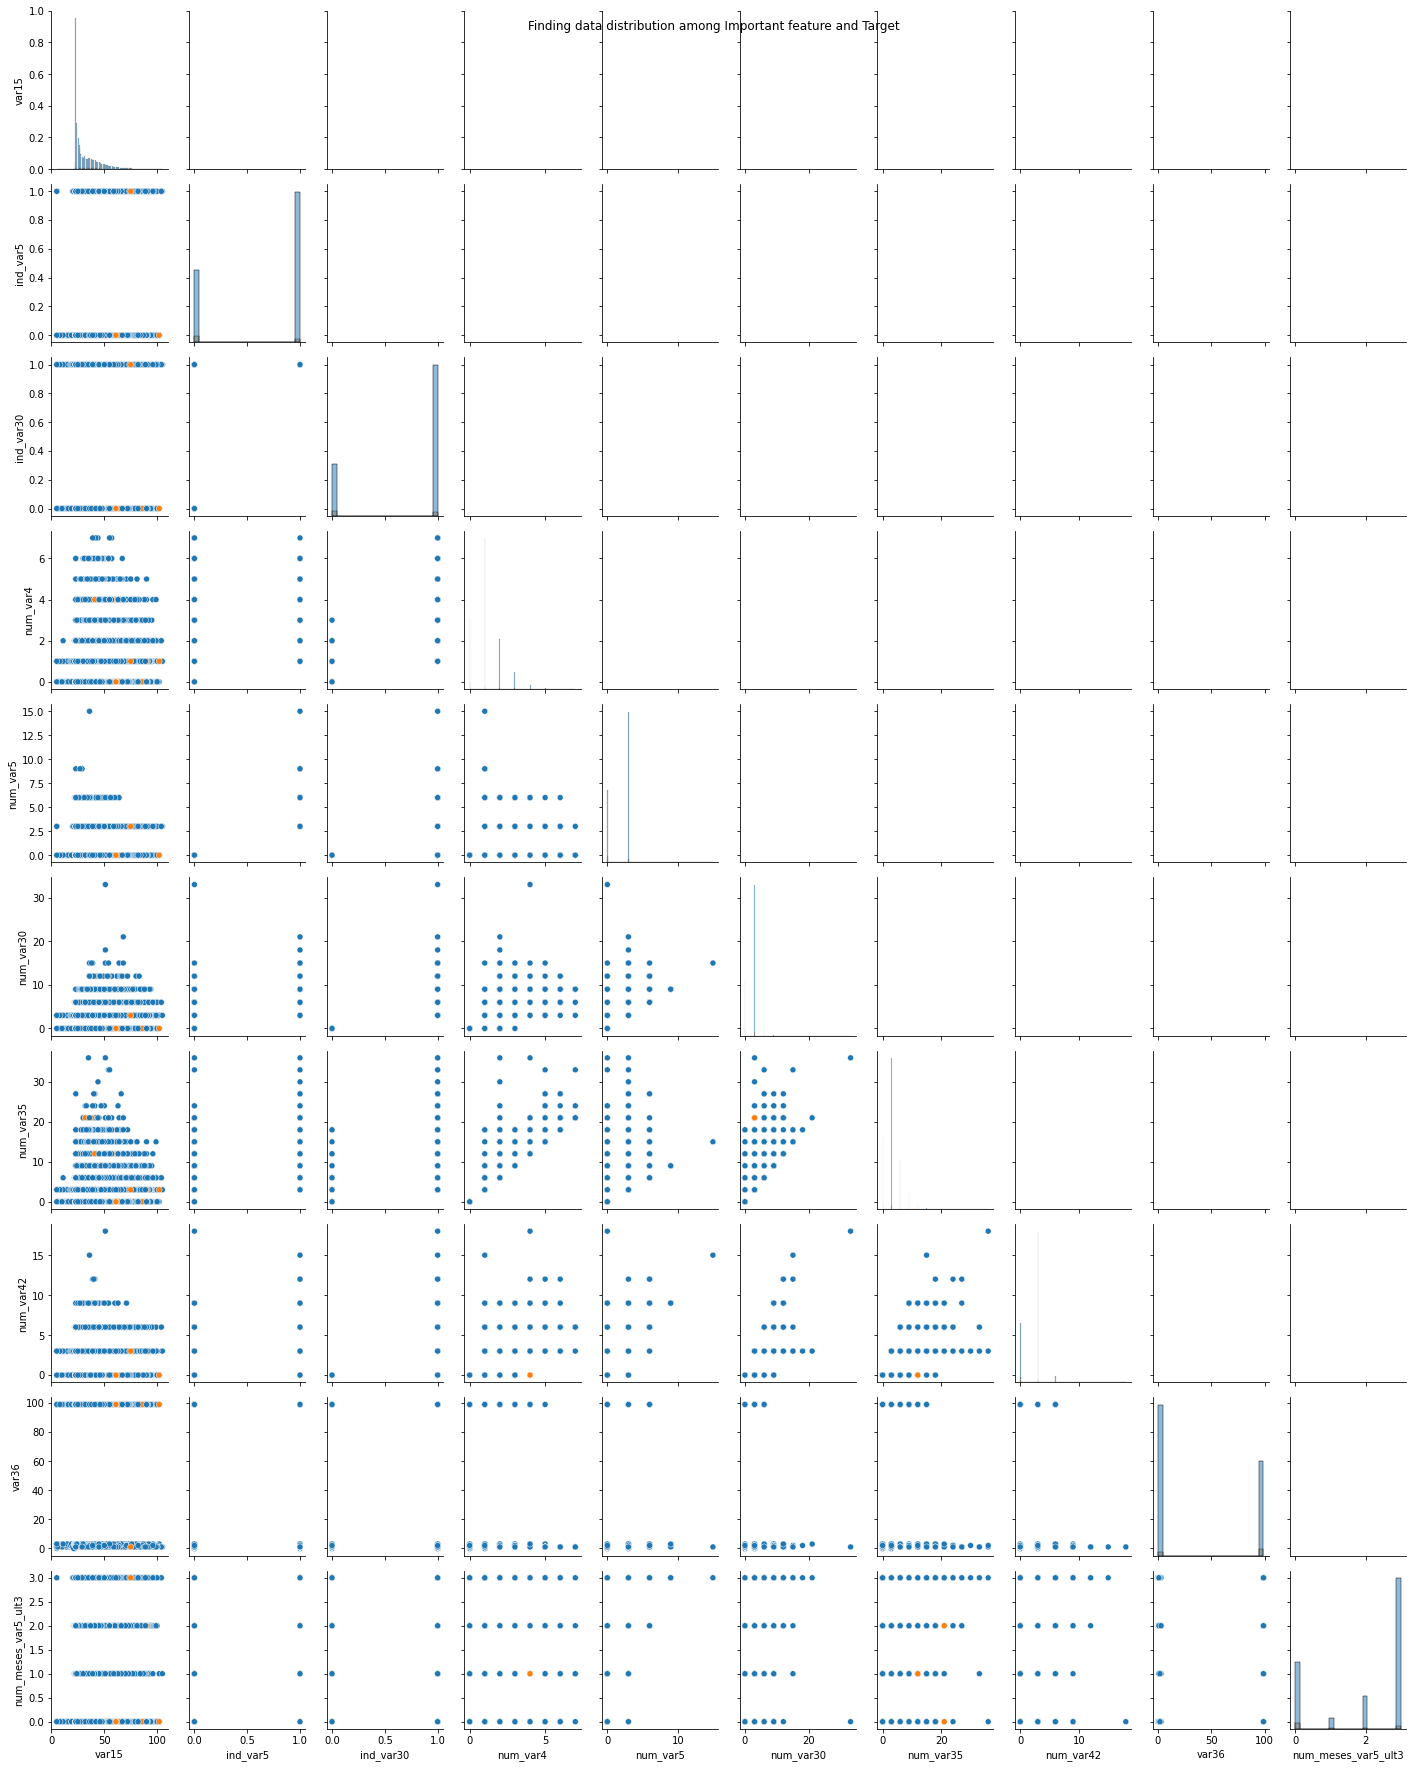

In [ ]:
#plot pait plot to test bi-virates relationship
plt.figure(figsize=(8,5))
g = sns.PairGrid(train_data[Top_10_Feature_With_target], hue="TARGET", aspect=0.8, diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
plt.suptitle('Finding data distribution among Important feature and Target')
plt.show()

By seeing  above grap we can say  var15 have repaltionship with other feature where we found  happy and unhappy customer both.
also we found num_var25 and num_meses_var5_ult3 have some relationship with respect to target variabl.

Although we do not get more infromation about data and also seems data is  not 
separable,however we get some  data  pattern such kind of pattern consider as categorcal in nature with prefix "num" let dig out more to make sure about data nature.



In [ ]:
train_data[Num_colm].nunique()

num_var1_0                3
num_var1                  3
num_var4                  8
num_var5_0                5
num_var5                  5
                       ... 
num_venta_var44_ult1      9
num_var45_hace2          85
num_var45_hace3          66
num_var45_ult1           94
num_var45_ult3          172
Length: 143, dtype: int64

we can see max "num" count is 172 ,so we can say its kind of categorical in nature.

##Check features with correlation

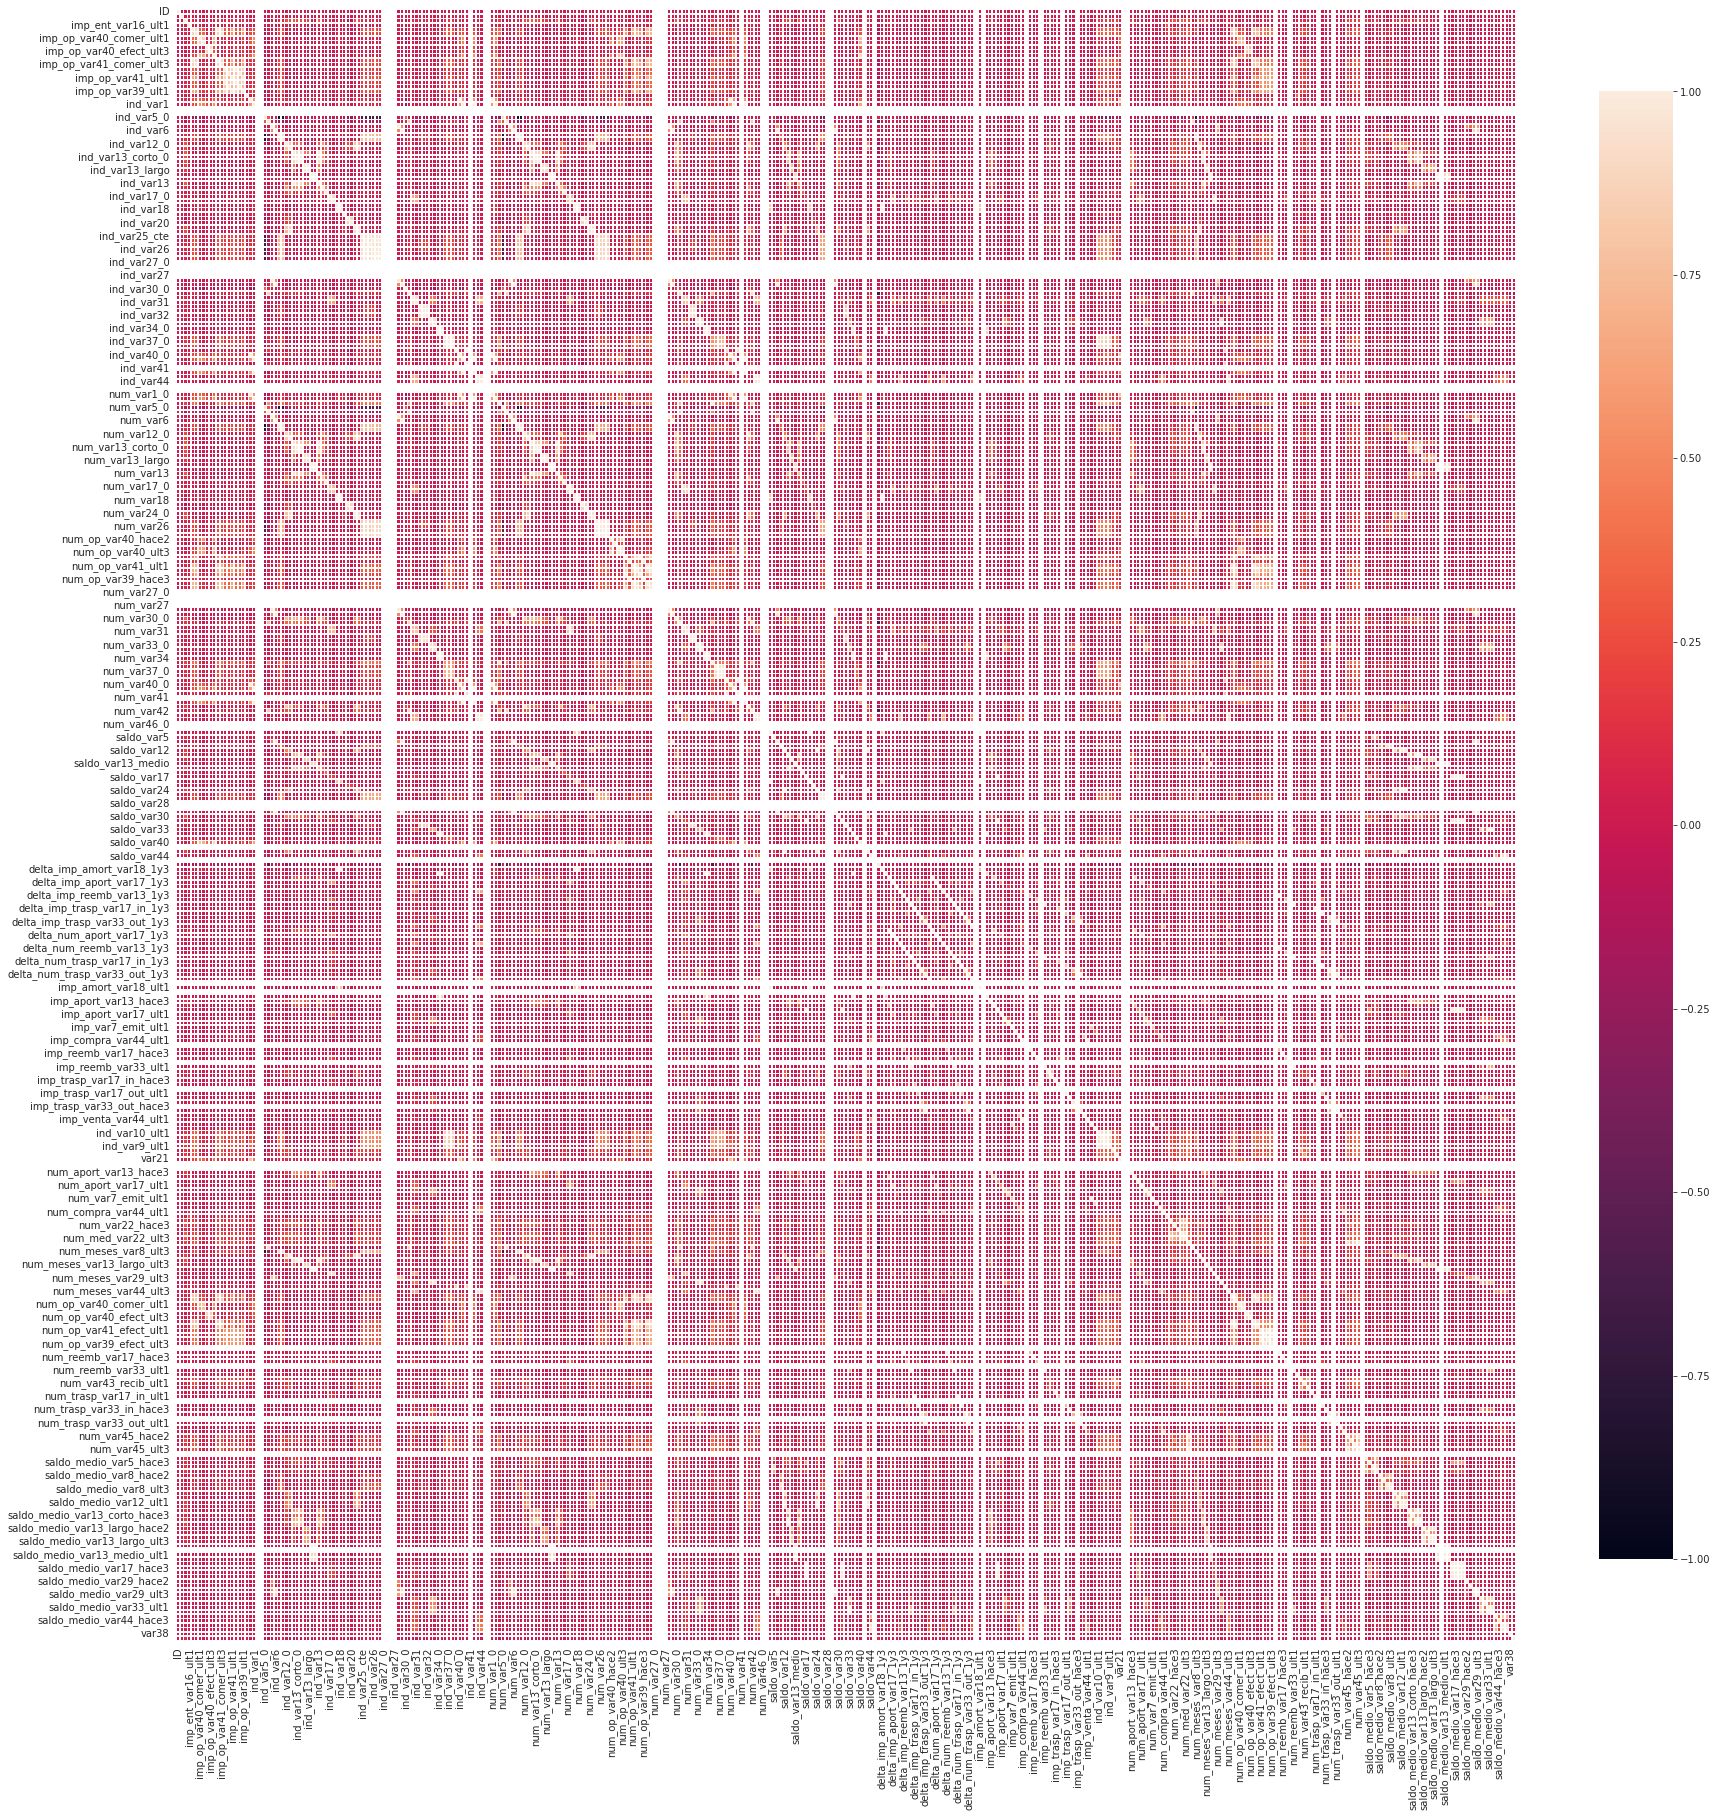

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,30))
sns.heatmap(train_data.corr(),vmin= -1, vmax=1.0,  fmt='.2f',
                 linewidths=.5,  cbar_kws={"shrink": .90},ax=ax1)
plt.show()

There are many corelation feature seems in above plot ,but due to density of graph  we cant not read this graph properly or seems hard to read ,so we will check with top feature .
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the  features.

###Lets check feature corelationship with 20 important feature as we got from using SelectKBest 

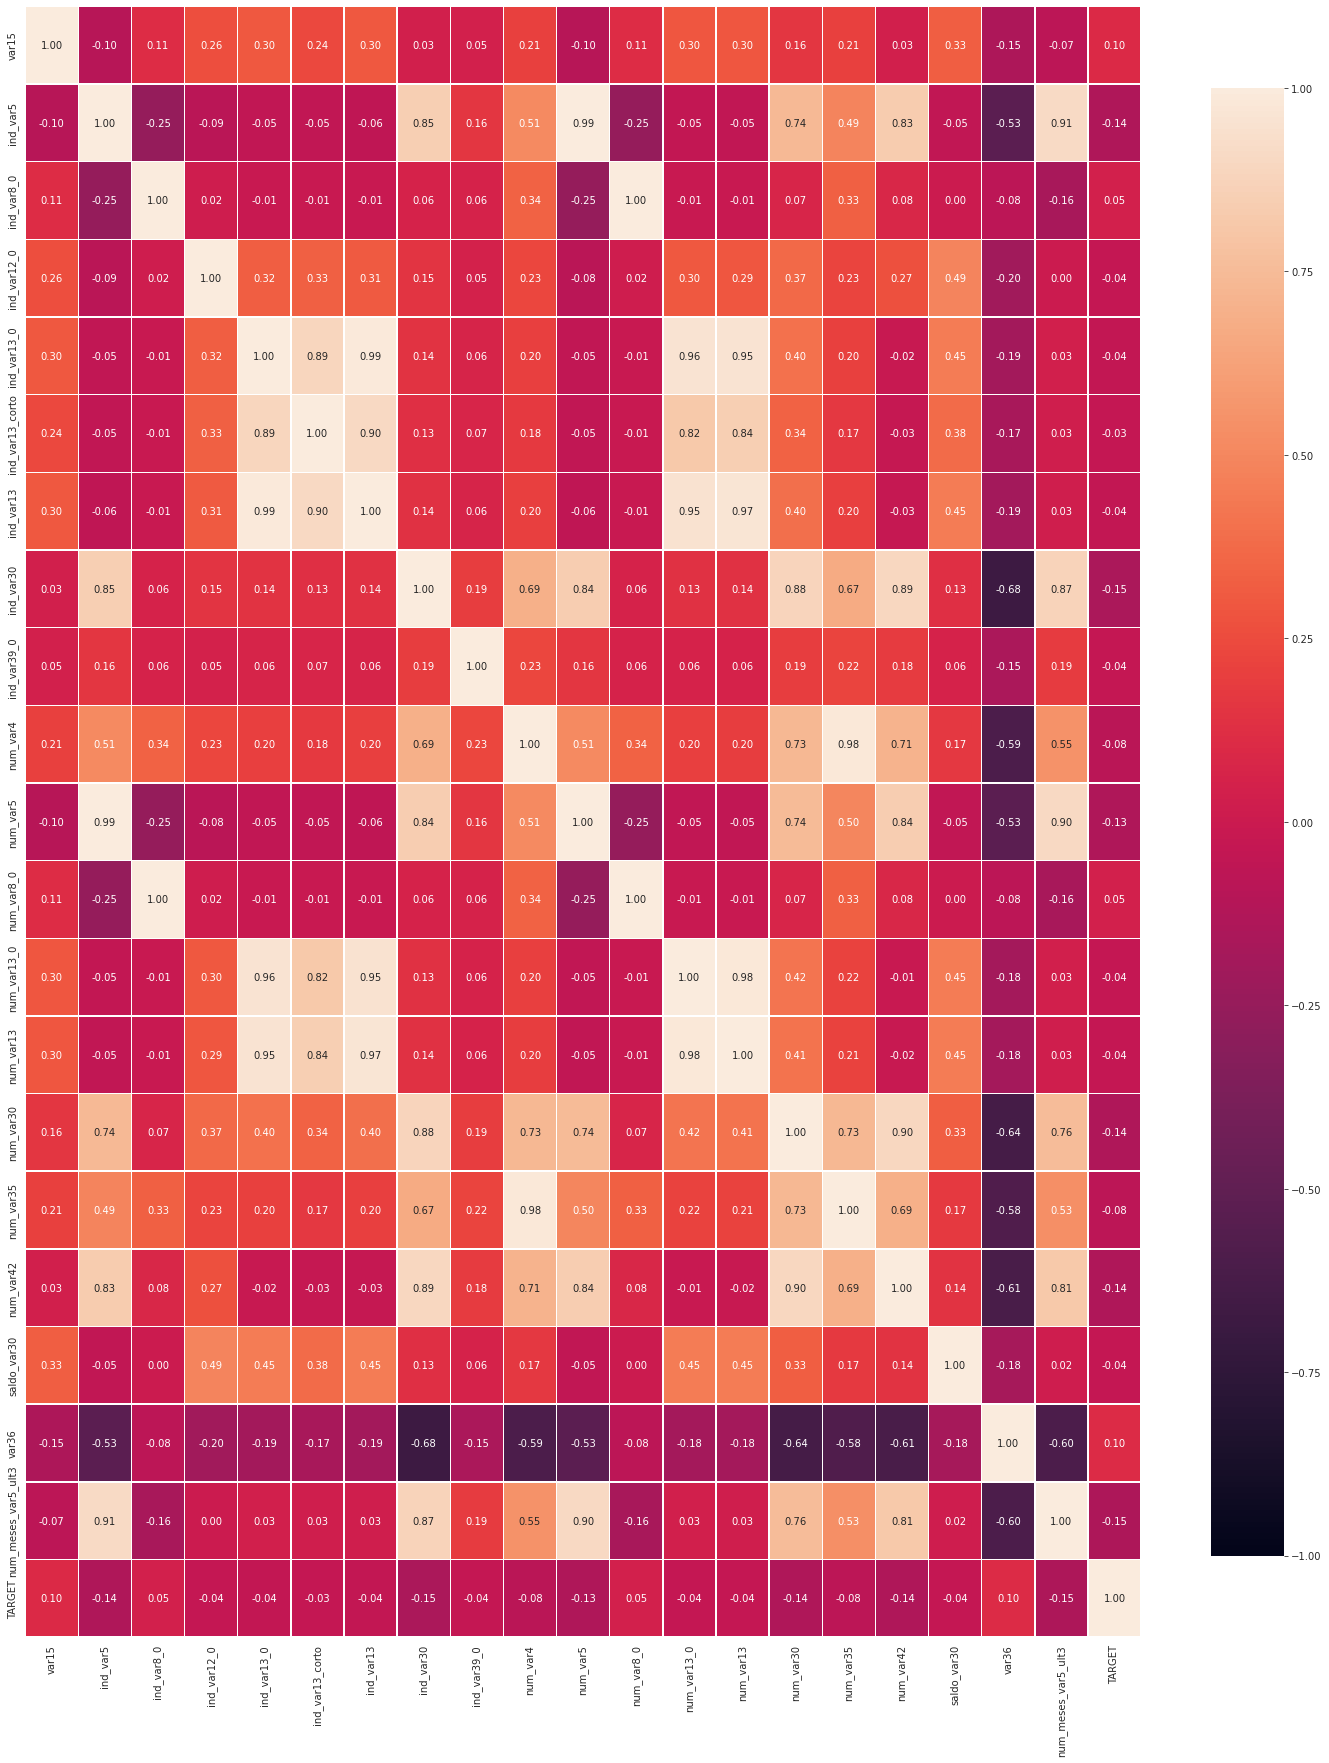

In [ ]:
fig, ax1 = plt.subplots(figsize=(25,30))
sns.heatmap(Top_20_Feature_With_target.corr(),vmin= -1, vmax=1.0, annot=True, fmt='.2f',
                 linewidths=.5,  cbar_kws={"shrink": .90},ax=ax1)
plt.show()

Now we can see high corealted featute ,we will remove higly corelated feature during feature  engineering.

###PCA visualization

In [ ]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(76020, 369)


In [ ]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
data=standardized_data
label=y
pca_data = pca.fit_transform(data)
# even tried this  code but still getting same resault  (pca_data = pca.fit_transform(data))

# pca_reduced will contain the 3-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (76020, 2)


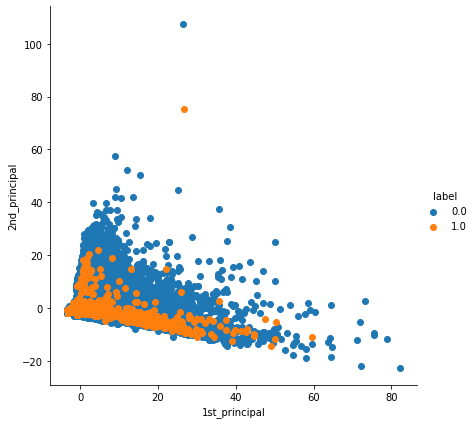

In [ ]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","label"))
sns.FacetGrid(pca_df,hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Now we can visualize most of the  data being overlap its  means we can not find that the which  feature are  independent.so its does not seem usefull.


Create New Feature

1.   Based on var15 make a new feature whether the age of happy customer is below 23 or not.
2.   We can also  add the statistical indicators(mean,median,std,min,max)
3. Using  PCA to reduce dimension and without PCA .
4. Apply  one hot encoding to Num_colm and create new datasets.


##Feature Preprocessing

###Removing constant features
This dataset contains constant features. I know this from previous analysis so I will quickly remove these features to reduce the data size.

Such kind  of feature do not give any contibution during classification process.

In [ ]:
x_train=train_data.drop(["ID","TARGET"],axis = 1)
y_train=train_data["TARGET"]
x_test=test_data.drop(["ID"],axis = 1)
print(x_train.shape)
print(x_test.shape)

(76020, 369)
(75818, 369)


In [ ]:
def Remove_const_Fetaure(x_train,x_test):
  vt = VarianceThreshold(threshold=0)
  v_threshold = vt.fit(x_train) 
  #The get_support returns a Boolean vector where True means that the variable does not have zero variance so we will remove False vaibale
  constant_ = v_threshold.get_support()
  constant_feature=np.where(constant_==False)
  x_train.drop(x_train.columns[constant_feature],axis=1,inplace=True)
  x_test.drop(x_test.columns[constant_feature],axis=1,inplace=True)
  print("Total constant feature {}".format(len(constant_feature[0])))
  print("Remaining columns after removing constant feature on train dataset {}".format(x_train.shape[1]))
  print("Remaining columns after removing constant feature on test dataset {}".format(x_test.shape[1]))


In [ ]:
Remove_const_Fetaure(x_train,x_test)

Total constant feature 34
Remaining columns after removing constant feature on train dataset 335
Remaining columns after removing constant feature on test dataset 335


###Removing Quassi constant features

Using a feature with  little variane(Quassi) only adds to model complexity, not to its predictive power ,So we will remove feature with lower variacnce.

In [ ]:
def Remove_quassiconst_Fetaure(x_train,x_test):
  vt = VarianceThreshold(threshold=0.02)
  v_threshold = vt.fit(x_train) 
  #The get_support returns a Boolean vector where True means that the variable does not have zero variance so we will remove False vaibale
  constant_ = v_threshold.get_support()
  constant_feature=np.where(constant_==False)
  x_train.drop(x_train.columns[constant_feature],axis=1,inplace=True)
  x_test.drop(x_test.columns[constant_feature],axis=1,inplace=True)
  print("Total quassi constant feature {}".format(len(constant_feature[0])))
  print("Remaining columns after removing quassi constant feature on train dataset {}".format(x_train.shape[1]))
  print("Remaining columns after removing quassi constant feature on test dataset {}".format(x_test.shape[1]))


In [ ]:
Remove_quassiconst_Fetaure(x_train,x_test)

Total quassi constant feature 72
Remaining columns after removing quassi constant feature on train dataset 263
Remaining columns after removing quassi constant feature on test dataset 263


###Removing Duplicate Features using Transpose
By refering some blog come to know this dataset also have duplicate feature(columns) .we have no built-in Python method that can remove duplicate features. However, we have a method that can help us identify duplicate rows in a pandas dataframe. We will use this method to first take a transpose of our dataset as shown below:


In [ ]:
train_features_T = x_train.T
print("tarin data shape after tarnspose",train_features_T.shape)
test_features_T = x_test.T
print("test data shape after tarnspose",test_features_T.shape)

tarin data shape after tarnspose (263, 76020)
test data shape after tarnspose (263, 75818)


In the script above we take the transpose of our training data and store it in the train_features_T dataframe same with test data. Our initial training set contains 76020 rows and 370 columns, if you take a look at the shape of the transposed training set, you will see that it contains 370 rows and 76020 columns.

Luckily, in pandas we have duplicated() method which can help us find duplicate rows from the dataframe. Remember, the rows of the transposed dataframe are actually the columns or the features of the actual dataframe.

Let's find the total number of duplicate features in our dataset using the sum() method, chained with the duplicated() method as shown below.

In [ ]:
print("Total duplicate feature in training data = {}".format(train_features_T.duplicated().sum()))
print("Total duplicate feature in test data = {}".format(test_features_T.duplicated().sum()))

Total duplicate feature in training data = 16
Total duplicate feature in test data = 20


Finally, we can drop the duplicate rows using the drop_duplicates() method. If you pass the string value first to the keep parameter of the drop_duplicates() method, all the duplicate rows will be dropped except the first copy. In the next step we will remove all the duplicate rows and will take transpose of the transposed training set to get the original training set that doesn't contain any duplicate column. Execute the following script

In [ ]:
x_train_ = train_features_T.drop_duplicates(keep='first').T
x_test_ = test_features_T.drop_duplicates(keep='first').T
print("new training set without duplicate features:",x_train_.shape)
print("new testing set without duplicate features:",x_test_.shape)

new training set without duplicate features: (76020, 247)
new testing set without duplicate features: (75818, 243)


###Removing correlated  feature
If the two variables move in the same direction, then those variables are said to have a positive correlation. If they move in opposite directions, then they have a negative correlation.Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So we can drop one of the  features.
From the heatmap of features in EDA its clear that feature are highly corellated so we are keeping threshold 0.80 That means if two features have correlation greater than 0.80, then second feature will be dropped and first one will be kept.

In [ ]:
#Correlation 
cor_feature = abs(x_train_.corr())
#Selecting highly correlated features
correlated_features = set()
for i in range(len(cor_feature.columns)):
    for j in range(i):
        if abs(cor_feature.iloc[i, j]) > 0.8:
            colname = cor_feature.columns[i]
            correlated_features.add(colname)

In [ ]:
print("Total we have {} correlated  feature".format(len(correlated_features)))

Total we have 127 correlated  feature


In [ ]:
x_train.drop(correlated_features, axis=1, inplace=True)
x_test.drop(correlated_features, axis=1, inplace=True)

In [ ]:
(x_train.shape) ,(x_test.shape)

((76020, 136), (75818, 136))

After removing coreallaion feature left with 166 feature  in train data and 167 in test data.

##Feature Engineering

In [ ]:
#While doing EDA we find  natonlaity of customer  -999999 look like outlier
# Replace -999999 in var3 column with most common value 2 
# See https://www.kaggle.com/cast42/santander-customer-satisfaction/debugging-var3-999999
# for details
x_train = x_train.replace(-999999,2)
x_train.loc[x_train.var3==-999999].shape

(0, 136)

Create new dataset with statistical indicators(sum,mean,median,std,min,max)

###One Hot Encoding
The maximum number of unique values found for a feature with ‘num’ keyword is 172(total datapoints is around 70k) and minimum was 2.

In [ ]:
Num_colm_one=[]
for i in x_train.columns:
  res=i.split("_")[0] 
  if res =='num':
    Num_colm_one.append(i)
print(Num_colm_one)
print("Number of "'num'" prefix column is = {}".format(len(Num_colm_one)))

['num_var1_0', 'num_var1', 'num_var4', 'num_var13_largo_0', 'num_var14_0', 'num_var14', 'num_var17_0', 'num_var20_0', 'num_var26', 'num_var25', 'num_op_var40_hace2', 'num_op_var40_hace3', 'num_op_var40_ult1', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1', 'num_var30_0', 'num_var37_med_ult2', 'num_var37', 'num_var39', 'num_aport_var13_hace3', 'num_aport_var17_ult1', 'num_var7_recib_ult1', 'num_compra_var44_ult1', 'num_ent_var16_ult1', 'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3', 'num_med_var45_ult3', 'num_meses_var13_largo_ult3', 'num_op_var40_comer_ult1', 'num_op_var41_efect_ult1', 'num_sal_var16_ult1', 'num_var43_emit_ult1', 'num_var43_recib_ult1', 'num_trasp_var11_ult1', 'num_var45_hace3']
Number of num prefix column is = 38


In [ ]:
#getting all columns with less than or equal to 10 nunique values
cat_col = []
for col in Num_colm_one:
  if (x_train[col].nunique()<=10)  & (x_train[col].nunique()>2):
    cat_col.append(col)
print("There are %i columns which have less than or equal to 10 and greater than 2 number of unique values. \nWe will create \
new datasets which use one hot encoding"%(len(cat_col)))

There are 15 columns which have less than or equal to 10 and greater than 2 number of unique values. 
We will create new datasets which use one hot encoding


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x_train[cat_col].values) 

temp_train = enc.transform(x_train[cat_col].values).toarray()# Transform train data to  onehot encoding  

temp_test = enc.transform(x_test[cat_col].values).toarray()# Transform test data to  onehot encoding  
ohe_df = pd.DataFrame(temp_train,columns=enc.get_feature_names())# Get feature name  train
ohe_df_test = pd.DataFrame(temp_test,columns=enc.get_feature_names())# Get feature name test

x_train = pd.concat([x_train, ohe_df], axis=1).drop(x_train[cat_col], axis=1)#Remove categorical columns (will replace with one-hot encoding) Train data

x_test = pd.concat([x_test, ohe_df_test], axis=1).drop(x_test[cat_col], axis=1)#Remove categorical columns (will replace with one-hot encoding) Test data

In [ ]:
x_train.shape, x_test.shape

((76020, 216), (75818, 216))

In [ ]:
feature=x_train.columns.values
for df in [x_train,x_test]:
  df["sum"]=df[feature].sum(axis=1)
  df["mean"]=df[feature].mean(axis=1)
  df["min"]=df[feature].min(axis=1)
  df["max"]=df[feature].max(axis=1)
  df["std"]=df[feature].std(axis=1)
  df["med"]=df[feature].median(axis=1)
x_train[x_train.columns[216:]].head(10)

,sum,mean,min,max,std,med
0,39349.170000,182.172083,0.0,39205.17,2667.537314,0.0
1,50451.140000,233.570093,-1.0,49278.03,3352.773532,0.0
2,67487.950000,312.444213,0.0,67333.77,4581.439172,0.0
3,64674.250000,299.417824,0.0,64007.97,4355.024504,0.0
4,792424.279016,3668.630921,0.0,270003.00,25374.754474,0.0
5,88119.750000,407.961806,0.0,87975.75,5985.950006,0.0
6,95019.080000,439.903148,0.0,94956.66,6460.962878,0.0
7,251698.830000,1165.272361,0.0,251638.95,17121.843006,0.0
8,102128.020000,472.814907,0.0,101962.02,6937.588123,0.0
9,356520.850000,1650.559491,0.0,356463.06,24254.220918,0.0


In [ ]:
x_test[x_test.columns[216:]].head(10)

,sum,mean,min,max,std,med
0,124711.033841,940.565485,0.0,124711.033841,12102.198952,0.0
1,139933.187302,1055.387859,0.0,139933.187302,13579.498791,0.0
2,145060.387801,1093.674890,0.0,145060.387801,14074.598654,0.0
3,577641.239308,4356.931841,0.0,577641.239308,56057.899562,0.0
4,226587.748067,1708.931965,0.0,226587.748067,21988.617645,0.0
5,163951.119354,1236.429589,0.0,163951.119354,15909.599598,0.0
6,279850.258885,2032.637738,0.0,279850.258885,26764.612433,0.0
7,144402.281062,1088.995820,0.0,144402.281062,14012.560575,0.0
8,340864.557164,2569.761911,0.0,340864.557164,33071.583881,0.0
9,133303.596462,1000.674157,0.0,133303.596462,12906.967470,0.0


###Creating new datasets (Age below 23 or not )

In [ ]:
def age_23(tarin_,test_):
  
  for data in (tarin_,test_):

      age_below_23=[]
      for age in (data["var15"]):
          if age < 23 :
            age_below_23.append(1)
          else:
            age_below_23.append(0)
        
      data["age_below_23"]=age_below_23

      print("New feature added below 23 age and shape",data.shape)
      print("-------------------------------")

In [ ]:
age_23(x_train,x_test)

New feature added below 23 age and shape (76020, 223)
-------------------------------
New feature added below 23 age and shape (75818, 223)
-------------------------------


we are considring age below 23 is happy customer represented by 1 and unhappy customer above 23 represent by 0.

####Standard Scaling

In [ ]:
data_train = x_train.fillna(x_test.mean())
data_test = x_test.fillna(x_test.mean())

In [ ]:
(data_train.shape) ,(data_test.shape)

((76020, 223), (75818, 223))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std=sc.fit_transform(data_train)
X_test_std = sc.transform(data_test)

###Using PCA for  Dimensionality Reduction

In [ ]:
# fit and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

##Modeling

###Using Cross validation to find best param with PCA

In [ ]:
def find_best_params_pca(model,params,cv=10,n_jobs=-1):
  """
  Funcion which implements random Seacrh CV and returns best model
  """
  random_cv = RandomizedSearchCV(model,param_distributions=params,scoring='roc_auc',n_jobs=n_jobs,cv=cv,verbose=2)
  random_cv.fit(X_train_pca,y_train)
  print("The best auc score was %.3f"%(random_cv.best_score_))
  print("The best params were: %s"%(random_cv.best_params_))
  return random_cv.best_estimator_

###Using Cross validation to find best param without PCA

In [ ]:
def find_best_params(model,params,cv=10,n_jobs=-1):
  """
  Funcion which implements random Seacrh CV and returns best model
  """
  random_cv = RandomizedSearchCV(model,param_distributions=params,scoring='roc_auc',n_jobs=n_jobs,cv=cv,verbose=2)
  random_cv.fit(X_train_std,y_train)
  print("The best auc score was %.3f"%(random_cv.best_score_))
  print("The best params were: %s"%(random_cv.best_params_))
  return random_cv.best_estimator_

###Logistic regression(Base model)
####As Data is not linerly seprable so we can assume that Logistic regression will not work well .still try with Logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(class_weight='balanced')
params = {'penalty':['l2','l1','elasticnet'], 'C':[1.0,1.5,2.0,2.5,3.0], 
          'fit_intercept':[True,False] }

In [ ]:
find_best_params_pca(model_lr,params)# Best param PCA model

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The best auc score was 0.530
The best params were: {'penalty': 'l2', 'fit_intercept': True, 'C': 2.5}


LogisticRegression(C=2.5, class_weight='balanced')

In [ ]:
find_best_params(model_lr,params)# Best param without PCA model

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The best auc score was 0.794
The best params were: {'penalty': 'l2', 'fit_intercept': True, 'C': 1.0}


LogisticRegression(class_weight='balanced')

Logistic regression


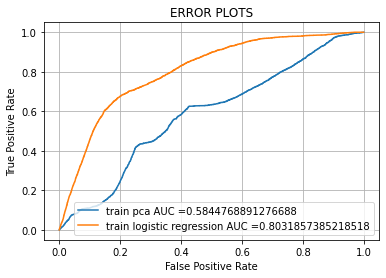

In [ ]:
clf_lg_pca = LogisticRegression(C=3.0, class_weight='balanced',
                   fit_intercept=True, penalty='l2', verbose=0)

clf_lg_pca.fit(X_train_pca,y_train)
y_train_pred_pca = clf_lg_pca.predict_proba(X_train_pca)

clf_lg = LogisticRegression(C=1.0, class_weight='balanced',
                   fit_intercept=True, penalty='l2', verbose=0)

clf_lg.fit(X_train_std,y_train)
y_train_pred = clf_lg.predict_proba(X_train_std)

train_fpr_pca, train_tpr_pca, tr_thresholds_pca = roc_curve(y_train, y_train_pred_pca[:,1])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
plt.plot(train_fpr_pca, train_tpr_pca, label="train pca AUC ="+str(auc(train_fpr_pca, train_tpr_pca)))
plt.plot(train_fpr, train_tpr, label="train logistic regression AUC ="+str(auc(train_fpr, train_tpr)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

Saving models to pickle file

In [ ]:
import pickle
model_name = "LogisticRegression.pkl"
with open(model_name, 'wb') as file: pickle.dump(clf_lg, file)

In [ ]:
#probabilistic perdiction on test data
y_test_pred_lg = clf_lg.predict_proba(X_test_std)[:,1] #test data

In [ ]:
#perdiction on test
sample_submission=pd.read_csv("/content/drive/MyDrive/santander-customer-satisfaction/sample_submission.csv")
sample_submission["TARGET"]=y_test_pred_lg
sample_submission.to_csv("Logisticregression.csv",index=False)

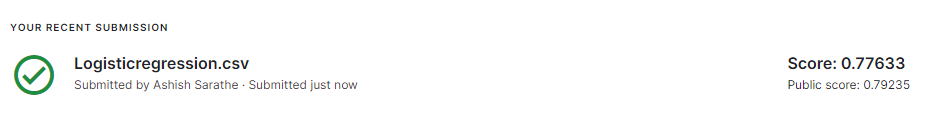

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 400, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }


In [ ]:
find_best_params_pca(model_random_forest,random_grid)# Best param with PCA model

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The best auc score was 0.788
The best params were: {'n_estimators': 133, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=133)

In [ ]:
find_best_params(model_random_forest,random_grid) # Best param without PCA model

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The best auc score was 0.829
The best params were: {'n_estimators': 283, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 80}


RandomForestClassifier(max_depth=80, min_samples_leaf=4, n_estimators=283)

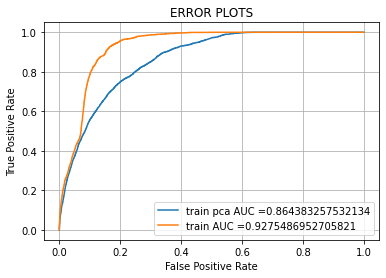

In [ ]:

clf_RM_pca=RandomForestClassifier(n_estimators= 133, min_samples_split= 10, min_samples_leaf=2, max_features= 'auto', max_depth= 10, 
                              random_state=45,class_weight='balanced' )

clf_RM_pca.fit(X_train_pca,y_train)
y_train_pred_pca = clf_RM_pca.predict_proba(X_train_pca)

clf_RM=RandomForestClassifier(n_estimators= 283, min_samples_split= 2, min_samples_leaf=4, max_features= 'auto', max_depth= 80, 
                               random_state=45 ,class_weight='balanced')

clf_RM.fit(X_train_std,y_train)
y_train_pred = clf_RM.predict_proba(X_train_std)

train_fpr_pca, train_tpr_pca, tr_thresholds_pca = roc_curve(y_train, y_train_pred_pca[:,1])
train_fpr_rm, train_tpr_rm, tr_thresholds_rm = roc_curve(y_train, y_train_pred[:,1])

plt.plot(train_fpr_pca, train_tpr_pca, label="train pca AUC ="+str(auc(train_fpr_pca, train_tpr_pca)))
plt.plot(train_fpr_rm, train_tpr_rm, label="train AUC ="+str(auc(train_fpr_rm, train_tpr_rm)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

Saving models to pickle file

In [ ]:
import pickle
model_name = "RandomForest.pkl"
with open(model_name, 'wb') as file: pickle.dump(clf_RM, file)

In [ ]:
#probabilistic perdiction on test data
y_test_pred_Rm = clf_RM.predict_proba(X_test_std)[:,1] #test data

In [ ]:
#perdiction on test
sample_submission=pd.read_csv("/content/drive/MyDrive/santander-customer-satisfaction/sample_submission.csv")
sample_submission["TARGET"]=y_test_pred_Rm
sample_submission.to_csv("RandomForest.csv",index=False)

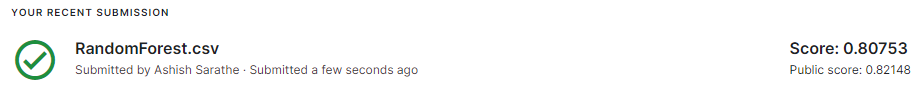

###XGBoost

In [ ]:
counter = Counter(train_data["TARGET"])
# estimate scale_pos_weight value
#scale_pos_weight = total_negative_examples / total_positive_examples
estimate = np.sqrt((counter[1]) / (counter[0]))
print('Estimate: %.3f' % estimate)#value to consider: sum(negative instances) / sum(positive instances)

Estimate: 0.203


In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(random_state=42)
# Number of trees in random forest
n_estimators_ = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Maximum number of levels in tree
max_depth_ = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split_ = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf_ = [1, 2, 4]

learning_rate=[0.01,0.1,0.02,0.03,0.2,0.4,0.5,0.6]

num_leave=[int(x) for x in np.linspace(10, 110, num = 11)]
min_child_weight=[x for x in np.linspace(0.01, 5, num = 10)]

random_grid_= {'n_estimators': n_estimators_,
               'max_depth': max_depth_,
               'min_samples_split': min_samples_split_,
               'min_samples_leaf': min_samples_leaf_,
               'learning_rate':learning_rate,
               'num_leaves':num_leave,
               'min_child_weight':min_child_weight
              }

In [ ]:
find_best_params_pca(model_xg,random_grid_)# Best param with PCA model
find_best_params(model_xg,random_grid_)# Best param without PCA mode

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The best auc score was 0.768
The best params were: {'num_leaves': 20, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_child_weight': 0.01, 'max_depth': 30, 'learning_rate': 0.02}


XGBClassifier(learning_rate=0.02, max_depth=30, min_child_weight=0.01,
              min_samples_leaf=4, min_samples_split=2, n_estimators=50,
              num_leaves=20, random_state=42)

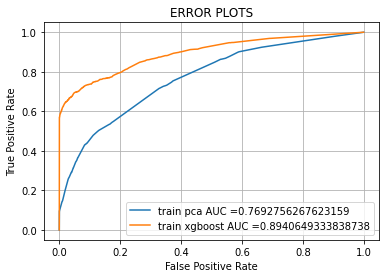

In [ ]:
clf_Xg_PCA =XGBClassifier(scale_pos_weight=0.20,learning_rate=0.02, max_depth=30, min_child_weight=0.01,
              min_samples_leaf=4, min_samples_split=2, n_estimators=30,reg_lambda=0.1,
              num_leaves=20, random_state=100)

clf_Xg_PCA.fit(X_train_pca,y_train)


y_train_pred_pca = clf_Xg_PCA.predict_proba(X_train_pca)

train_fpr_pca, train_tpr_pca, tr_thresholds_pca = roc_curve(y_train, y_train_pred_pca[:,1])
plt.plot(train_fpr_pca, train_tpr_pca, label="train pca AUC ="+str(auc(train_fpr_pca, train_tpr_pca)))

clf_Xg=XGBClassifier(scale_pos_weight=0.20,learning_rate=0.02, max_depth=45, min_child_weight=0.01,
              min_samples_leaf=4, min_samples_split=2, n_estimators=80,reg_lambda=0.1,
              num_leaves=20, random_state=100)

clf_Xg.fit(X_train_std,y_train)
y_train_pred = clf_Xg.predict_proba(X_train_std)

train_fpr_xg, train_tpr_xg, tr_thresholds_xg = roc_curve(y_train, y_train_pred[:,1])
plt.plot(train_fpr_xg, train_tpr_xg, label="train xgboost AUC ="+str(auc(train_fpr_xg, train_tpr_xg)))


plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

Saving models to pickle file

In [ ]:
import pickle
model_name = "Xgboostfile.pkl"
with open(model_name, 'wb') as file: pickle.dump(clf_Xg, file)

In [ ]:
#probabilistic perdiction on test data
y_test_pred_xg = clf_Xg.predict_proba(X_test_std)[:,1] #test data

In [ ]:
#perdiction on test
sample_submission=pd.read_csv("/content/drive/MyDrive/santander-customer-satisfaction/sample_submission.csv")
sample_submission["TARGET"]=y_test_pred_xg
sample_submission.to_csv("Xgboostresult.csv",index=False)

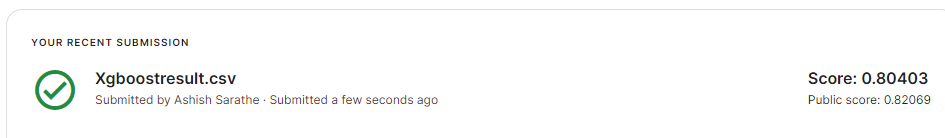

###LGBM

In [ ]:
from lightgbm import LGBMClassifier
modellgbm = LGBMClassifier()
# Number of trees in random forest
n_estimators_lg = [int(x) for x in np.linspace(start = 50, stop = 400, num = 10)]
# Maximum number of levels in tree
max_depth_lg = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split_lg = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf_lg = [1, 2, 4]

learning_rate=[0.01,0.1,0.02,0.03,0.2,0.4,0.5,0.6]

num_leave=[int(x) for x in np.linspace(10, 110, num = 11)]
min_child_weight=[x for x in np.linspace(0.01, 5, num = 10)]

random_grid_lg = {'n_estimators': n_estimators_lg,
               'max_depth': max_depth_lg,
               'min_samples_split': min_samples_split_lg,
               'min_samples_leaf': min_samples_leaf_lg,
               'learning_rate':learning_rate,
               'num_leaves':num_leave,
               'min_child_weight':min_child_weight
              }

In [ ]:
find_best_params_pca(modellgbm,params)# Best param with PCA model

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The best auc score was 0.787
The best params were: {'subsample': 0.5, 'num_leaves': 40, 'n_estimators': 80, 'max_depth': 4, 'learning_rate': 0.2}


LGBMClassifier(class_weight='balanced', learning_rate=0.2, max_depth=4,
               n_estimators=80, num_leaves=40, subsample=0.5)

In [ ]:
find_best_params(modellgbm,params)# Best param without PCA model

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The best auc score was 0.838
The best params were: {'subsample': 0.6, 'num_leaves': 20, 'n_estimators': 205, 'max_depth': 3, 'learning_rate': 0.03}


LGBMClassifier(class_weight='balanced', learning_rate=0.03, max_depth=3,
               n_estimators=205, num_leaves=20, subsample=0.6)

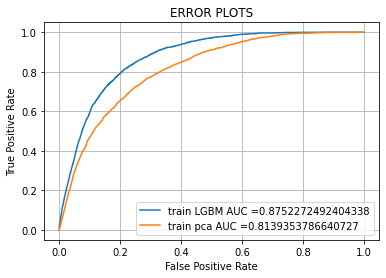

In [ ]:

clf_lgbm_pca = LGBMClassifier(boosting_type='gbdt',class_weight='balanced',max_features= 'auto',learning_rate=0.2, max_depth=4,
               n_estimators=80, num_leaves=40, subsample=0.5,random_state=500)

clf_lgbm_pca.fit(X_train_pca,y_train)
y_train_pred_pca = clf_lgbm_pca.predict_proba(X_train_pca)


clf_lgbm = LGBMClassifier(boosting_type='gbdt', class_weight='balanced', colsample_bytree=0.5,
               importance_type='split', learning_rate=0.02, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=375, n_jobs=-1, nthread=-1, num_leaves=20,
               objective='binary', random_state=42, reg_alpha=0.4,
               reg_lambda=0.0, scale_pos_weight=1, silent=True, subsample=0.6,
               subsample_for_bin=200000, subsample_freq=0)
clf_lgbm.fit(X_train_std, y_train)

y_train_pred = clf_lgbm.predict_proba(X_train_std)

train_fpr_lgbm, train_tpr_lgbm, tr_thresholds_lgbm = roc_curve(y_train, y_train_pred[:,1])
plt.plot(train_fpr_lgbm, train_tpr_lgbm, label="train LGBM AUC ="+str(auc(train_fpr_lgbm, train_tpr_lgbm)))

train_fpr_pca, train_tpr_pca, tr_thresholds_pca = roc_curve(y_train, y_train_pred_pca[:,1])
plt.plot(train_fpr_pca, train_tpr_pca, label="train pca AUC ="+str(auc(train_fpr_pca, train_tpr_pca)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

Saving models to pickle file

In [ ]:
import pickle
model_name = "LGBM.pkl"
with open(model_name, 'wb') as file: pickle.dump(clf_lgbm, file)

In [ ]:
#probabilistic perdiction on test data
y_test_pred_lgbm = clf_lgbm.predict_proba(X_test_std)[:,1] #test data

In [ ]:
#perdiction on test
sample_submission=pd.read_csv("/content/drive/MyDrive/santander-customer-satisfaction/sample_submission.csv")
sample_submission["TARGET"]=y_test_pred_lgbm
sample_submission.to_csv("LGBM.csv",index=False)

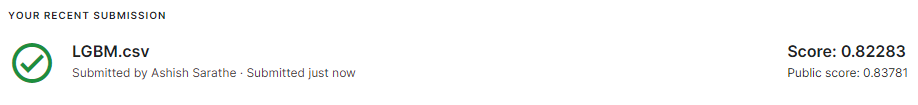

###Voting Classifier

Voting Classifier is an estimator that combines models representing different classification algorithms associated with individual weights for confidence. The Voting classifier estimator built by combining different classification models turns out to be stronger meta-classifier that balances out the individual classifiers’ weaknesses on a particular dataset. Voting classifier takes majority voting based on weights applied to the class or class probabilities and assigns a class label to a record based on majority vote.

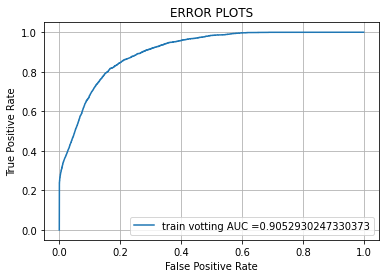

In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 =estimators=[('lr', clf_lg), ('rf', clf_RM), ('lgbm', clf_lgbm),('xg',clf_Xg)]
clf_ensemble = VotingClassifier(estimators=eclf1,voting='soft')
clf_ensemble.fit(X_train_std, y_train)

y_train_pred = clf_ensemble.predict_proba(X_train_std)

train_fpr_vo, train_tpr_vo, tr_thresholds_vo = roc_curve(y_train, y_train_pred[:,1])
plt.plot(train_fpr_vo, train_tpr_vo, label="train votting AUC ="+str(auc(train_fpr_vo, train_tpr_vo)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

Saving models to pickle file

In [ ]:
import pickle
model_name = "votting.pkl"
with open(model_name, 'wb') as file: pickle.dump(clf_ensemble, file)

In [ ]:
#probabilistic perdiction on test data
y_test_pred_votting = clf_ensemble.predict_proba(X_test_std)[:,1] #test data

In [ ]:
#perdiction on test
sample_submission=pd.read_csv("/content/drive/MyDrive/santander-customer-satisfaction/sample_submission.csv")
sample_submission["TARGET"]=y_test_pred_votting
sample_submission.to_csv("VottingClassfier.csv",index=False)

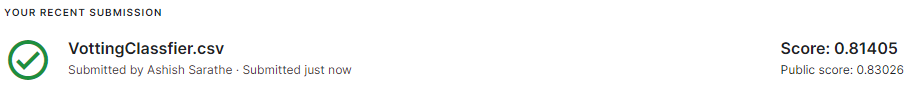

###Stacking Classifier

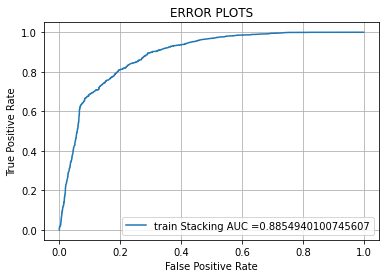

In [49]:
from sklearn.ensemble import StackingClassifier
eclfstack =[('lr', clf_lg), ('rf', clf_RM), ('lgbm', clf_lgbm),('xg',clf_Xg)]
clf_Stack1 = StackingClassifier(
    estimators=eclfstack, final_estimator=XGBClassifier(),stack_method='auto',
                         n_jobs=-1,)

clf_Stack1.fit(X_train_std, y_train)
y_train_pred_stack1 = clf_Stack1.predict_proba(X_train_std)

train_fpr_stack1, train_tpr_stack1, tr_thresholds_stack1 = roc_curve(y_train, y_train_pred_stack1[:,1])
plt.plot(train_fpr_stack1, train_tpr_stack1, label="train Stacking AUC ="+str(auc(train_fpr_stack1, train_tpr_stack1)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [53]:
import pickle
model_name = "Stackingxg.pkl"
with open(model_name, 'wb') as file: pickle.dump(clf_Stack, file)

In [54]:
#probabilistic perdiction on test data
y_test_pred_Stacking1 = clf_Stack1.predict_proba(X_test_std)[:,1] #test data

In [55]:
#perdiction on test
sample_submission=pd.read_csv("/content/drive/MyDrive/santander-customer-satisfaction/sample_submission.csv")
sample_submission["TARGET"]=y_test_pred_Stacking1
sample_submission.to_csv("Stackingxg.csv",index=False)

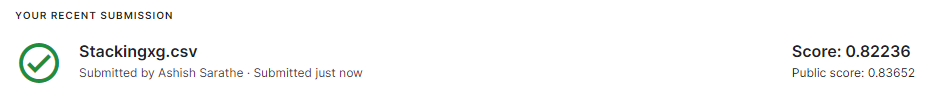

As we can see model with PCA is not performing well so will consider Model without PCA which is fairly doing well as compare to PCA.
Now we are plotting training  roc graph without PCA.

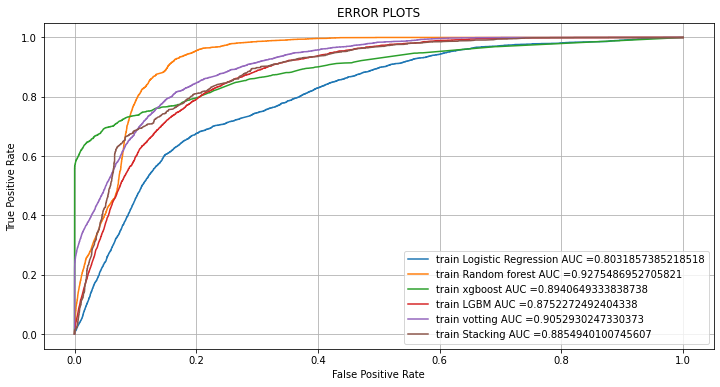

In [56]:
plt.figure(figsize=(12,6))
plt.plot(train_fpr, train_tpr, label="train Logistic Regression AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(train_fpr_rm, train_tpr_rm, label="train Random forest AUC ="+str(auc(train_fpr_rm, train_tpr_rm)))
plt.plot(train_fpr_xg, train_tpr_xg, label="train xgboost AUC ="+str(auc(train_fpr_xg, train_tpr_xg)))
plt.plot(train_fpr_lgbm, train_tpr_lgbm, label="train LGBM AUC ="+str(auc(train_fpr_lgbm, train_tpr_lgbm)))
plt.plot(train_fpr_vo, train_tpr_vo, label="train votting AUC ="+str(auc(train_fpr_vo, train_tpr_vo)))
plt.plot(train_fpr_stack1, train_tpr_stack1, label="train Stacking AUC ="+str(auc(train_fpr_stack1, train_tpr_stack1)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

###Ensemble(Weighted Averaging)
This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction.

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

In [ ]:
Weighte_dprediction= (y_test_pred_lg *0.1 + y_test_pred_Rm *0.1 + y_test_pred_xg*0.4 + y_test_pred_lgbm*0.4)
sample_submission=pd.read_csv("/content/drive/MyDrive/santander-customer-satisfaction/sample_submission.csv")
sample_submission["TARGET"]=Weighte_dprediction
sample_submission.to_csv("Ensemble_Result.csv",index=False)

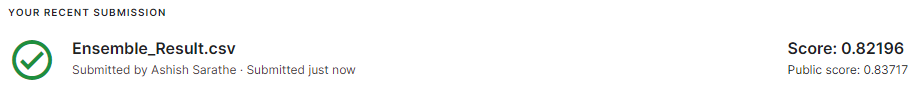

In [57]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Sequence", "Model","AUC Tarin","Public AUC Test score"]
table.add_row(['1',"Logistic Regression",'0.80' ,'0.795'])
table.add_row(['2',"Random Forest","0.92",'0.821'])
table.add_row(['3',"XGBoost","0.894",'0.820'])
table.add_row(['4',"LGBM","0.875",'0.8378'])
table.add_row(['5',"Votting classfier","0.90",'0.830'])
table.add_row(['6',"Ensemble(Weighted Averaging)","-",'0.8371'])
table.add_row(['7',"Stacking","-",'0.8361'])
print(table)

+----------+------------------------------+-----------+-----------------------+
| Sequence |            Model             | AUC Tarin | Public AUC Test score |
+----------+------------------------------+-----------+-----------------------+
|    1     |     Logistic Regression      |    0.80   |         0.795         |
|    2     |        Random Forest         |    0.92   |         0.821         |
|    3     |           XGBoost            |   0.894   |         0.820         |
|    4     |             LGBM             |   0.875   |         0.8378        |
|    5     |      Votting classfier       |    0.90   |         0.830         |
|    6     | Ensemble(Weighted Averaging) |     -     |         0.8371        |
|    7     |           Stacking           |     -     |         0.8361        |
+----------+------------------------------+-----------+-----------------------+


###Observation



1.   PCA is not usefull in this dataset.
2.   We applied logistic regression,Random Forest,Xgboost,LGBM,Votting Classifier,Ensemble(Weigted Average).
3.   Best model LGBM and  Ensemble(Weighted Averaging) which is giving good  Performace on test data,little bit LGBM perform better than Ensemble(Weighted Averaging).




